In [82]:
import vrep
import sys
import time
import numpy as np

import skfuzzy as fuzz
import skfuzzy.control as ctrl

In [83]:
DESTINATION_POINT = 0.1

C:\ProgramData\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\ProgramData\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


1.0


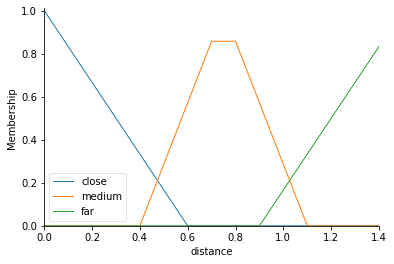

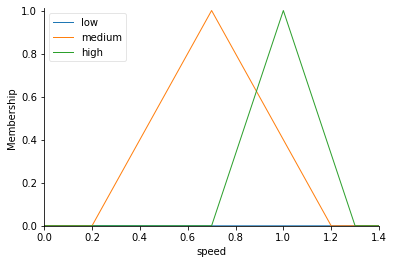

In [84]:
# Triangle membership function

distance = ctrl.Antecedent(np.arange(0, 1.5, 0.1), 'distance')
speed = ctrl.Consequent(np.arange(0, 1.5, 0.1), 'speed')

distance['close'] = fuzz.trimf(distance.universe, [0, 0, 0.6])
distance['medium'] = fuzz.trimf(distance.universe, [0.4, 0.75, 1.1])
distance['far'] = fuzz.trimf(distance.universe, [0.9, 1.5, 1.5])

distance.view()

speed['low'] = fuzz.trimf(speed.universe, [-1000, -500, 0.5])
speed['medium'] = fuzz.trimf(speed.universe, [0.2, 0.7, 1.2])
speed['high'] = fuzz.trimf(speed.universe, [0.7, 1, 1.3])

speed.view()

rule1 = ctrl.Rule(distance['close'], speed['low'])
rule2 = ctrl.Rule(distance['medium'], speed['medium'])
rule3 = ctrl.Rule(distance['far'], speed['high'])

control_system = ctrl.ControlSystem([rule1, rule2, rule3])
control = ctrl.ControlSystemSimulation(control_system)

control.input['distance'] = 1.3  # random value
control.compute()
print(control.output['speed'])

In [85]:
def set_speed(velocity):
    vrep.simxSetJointTargetVelocity(clientID, lb_motor_handle, velocity, vrep.simx_opmode_streaming)
    vrep.simxSetJointTargetVelocity(clientID, rb_motor_handle, velocity, vrep.simx_opmode_streaming)
    vrep.simxSetJointTargetVelocity(clientID, lf_motor_handle, velocity, vrep.simx_opmode_streaming)
    vrep.simxSetJointTargetVelocity(clientID, rf_motor_handle, velocity, vrep.simx_opmode_streaming)

In [86]:
vrep.simxFinish(-1)  # closes all opened connections, in case any previous wasn't finished
clientID = vrep.simxStart('127.0.0.1', 19999, True, True, 5000, 5)  # start a connection

if clientID != -1:
    print("Connected to remote API server")
else:
    print("Not connected to remote API server")
    sys.exit("Could not connect")

# get handles to robot drivers
lf_err_code, lf_motor_handle = vrep.simxGetObjectHandle(clientID, "WheelJoint_LF", vrep.simx_opmode_blocking)
lb_err_code, lb_motor_handle = vrep.simxGetObjectHandle(clientID, "WheelJoint_LB", vrep.simx_opmode_blocking)
rb_err_code, rb_motor_handle = vrep.simxGetObjectHandle(clientID, "WheelJoint_RB", vrep.simx_opmode_blocking)
rf_err_code, rf_motor_handle = vrep.simxGetObjectHandle(clientID, "WheelJoint_RF", vrep.simx_opmode_blocking)

# Turn on the drives
# err_code = vrep.simxSetJointTargetVelocity(clientID, lb_motor_handle, 1.0, vrep.simx_opmode_streaming)
# err_code = vrep.simxSetJointTargetVelocity(clientID, rb_motor_handle, 1.0, vrep.simx_opmode_streaming)
# err_code = vrep.simxSetJointTargetVelocity(clientID, lf_motor_handle, 1.0, vrep.simx_opmode_streaming)
# err_code = vrep.simxSetJointTargetVelocity(clientID, rf_motor_handle, 1.0, vrep.simx_opmode_streaming)

Connected to remote API server


In [87]:
# get handle to the load
load_err_code, load_handle = vrep.simxGetObjectHandle(clientID, "Load", vrep.simx_opmode_blocking)

# get first position of load
err_code, position = vrep.simxGetObjectPosition(clientID, load_handle, -1, vrep.simx_opmode_streaming)

# get positions of load
t = time.time()
while True:  # read values for 15 seconds
    err_code, position = vrep.simxGetObjectPosition(clientID, load_handle, -1, vrep.simx_opmode_buffer)
    if err_code == 0:
        distance = position[0] - DESTINATION_POINT
        control.input['distance'] = distance
        control.compute()
        speed = control.output['speed']
        set_speed(speed)
        print('Position =', position[0], '\t\tSpeed =', speed)

Position = 1.400067687034607 		Speed = 1.0000000000000002
Position = 1.400067687034607 		Speed = 1.0000000000000002
Position = 1.400067687034607 		Speed = 1.0000000000000002
Position = 1.400067687034607 		Speed = 1.0000000000000002
Position = 1.400067687034607 		Speed = 1.0000000000000002
Position = 1.400067687034607 		Speed = 1.0000000000000002
Position = 1.400067687034607 		Speed = 1.0000000000000002
Position = 1.400067687034607 		Speed = 1.0000000000000002
Position = 1.400067687034607 		Speed = 1.0000000000000002
Position = 1.400067687034607 		Speed = 1.0000000000000002
Position = 1.400067687034607 		Speed = 1.0000000000000002
Position = 1.400067687034607 		Speed = 1.0000000000000002
Position = 1.400067687034607 		Speed = 1.0000000000000002
Position = 1.400067687034607 		Speed = 1.0000000000000002
Position = 1.400067687034607 		Speed = 1.0000000000000002
Position = 1.400067687034607 		Speed = 1.0000000000000002
Position = 1.400067687034607 		Speed = 1.0000000000000002
Position = 1.4

Position = 1.4000113010406494 		Speed = 1.0000000000000002
Position = 1.4000113010406494 		Speed = 1.0000000000000002
Position = 1.4000113010406494 		Speed = 1.0000000000000002
Position = 1.4000113010406494 		Speed = 1.0000000000000002
Position = 1.4000113010406494 		Speed = 1.0000000000000002
Position = 1.4000113010406494 		Speed = 1.0000000000000002
Position = 1.4000113010406494 		Speed = 1.0000000000000002
Position = 1.4000113010406494 		Speed = 1.0000000000000002
Position = 1.4000113010406494 		Speed = 1.0000000000000002
Position = 1.4000113010406494 		Speed = 1.0000000000000002
Position = 1.3999531269073486 		Speed = 1.0
Position = 1.3999531269073486 		Speed = 1.0
Position = 1.3999531269073486 		Speed = 1.0
Position = 1.3999531269073486 		Speed = 1.0
Position = 1.3999531269073486 		Speed = 1.0
Position = 1.3999531269073486 		Speed = 1.0
Position = 1.3999531269073486 		Speed = 1.0
Position = 1.3999531269073486 		Speed = 1.0
Position = 1.3999531269073486 		Speed = 1.0
Position = 1.3

Position = 1.4000972509384155 		Speed = 0.9999999999999998
Position = 1.4000972509384155 		Speed = 0.9999999999999998
Position = 1.4000972509384155 		Speed = 0.9999999999999998
Position = 1.4000972509384155 		Speed = 0.9999999999999998
Position = 1.4000972509384155 		Speed = 0.9999999999999998
Position = 1.4000972509384155 		Speed = 0.9999999999999998
Position = 1.4000972509384155 		Speed = 0.9999999999999998
Position = 1.4000972509384155 		Speed = 0.9999999999999998
Position = 1.4000972509384155 		Speed = 0.9999999999999998
Position = 1.4000972509384155 		Speed = 0.9999999999999998
Position = 1.4000972509384155 		Speed = 0.9999999999999998
Position = 1.4000972509384155 		Speed = 0.9999999999999998
Position = 1.4000972509384155 		Speed = 0.9999999999999998
Position = 1.4000972509384155 		Speed = 0.9999999999999998
Position = 1.4000972509384155 		Speed = 0.9999999999999998
Position = 1.4000972509384155 		Speed = 0.9999999999999998
Position = 1.4000972509384155 		Speed = 0.99999999999999

Position = 1.3988184928894043 		Speed = 1.0
Position = 1.3988184928894043 		Speed = 1.0
Position = 1.3988184928894043 		Speed = 1.0
Position = 1.3988184928894043 		Speed = 1.0
Position = 1.3988184928894043 		Speed = 1.0
Position = 1.3988184928894043 		Speed = 1.0
Position = 1.3988184928894043 		Speed = 1.0
Position = 1.3988184928894043 		Speed = 1.0
Position = 1.3960835933685303 		Speed = 1.0
Position = 1.3960835933685303 		Speed = 1.0
Position = 1.3960835933685303 		Speed = 1.0
Position = 1.3960835933685303 		Speed = 1.0
Position = 1.3960835933685303 		Speed = 1.0
Position = 1.3960835933685303 		Speed = 1.0
Position = 1.3960835933685303 		Speed = 1.0
Position = 1.3960835933685303 		Speed = 1.0
Position = 1.3960835933685303 		Speed = 1.0
Position = 1.3960835933685303 		Speed = 1.0
Position = 1.3960835933685303 		Speed = 1.0
Position = 1.3960835933685303 		Speed = 1.0
Position = 1.3960835933685303 		Speed = 1.0
Position = 1.3960835933685303 		Speed = 1.0
Position = 1.3960835933685303 		

Position = 1.3769798278808594 		Speed = 1.0
Position = 1.3769798278808594 		Speed = 1.0
Position = 1.3769798278808594 		Speed = 1.0
Position = 1.3769798278808594 		Speed = 1.0
Position = 1.3769798278808594 		Speed = 1.0
Position = 1.3769798278808594 		Speed = 1.0
Position = 1.3769798278808594 		Speed = 1.0
Position = 1.3769798278808594 		Speed = 1.0
Position = 1.3769798278808594 		Speed = 1.0
Position = 1.3769798278808594 		Speed = 1.0
Position = 1.3769798278808594 		Speed = 1.0
Position = 1.3769798278808594 		Speed = 1.0
Position = 1.3769798278808594 		Speed = 1.0
Position = 1.3769798278808594 		Speed = 1.0
Position = 1.3769798278808594 		Speed = 1.0
Position = 1.3769798278808594 		Speed = 1.0
Position = 1.3769798278808594 		Speed = 1.0
Position = 1.3769798278808594 		Speed = 1.0
Position = 1.3769798278808594 		Speed = 1.0
Position = 1.3769798278808594 		Speed = 1.0
Position = 1.3769798278808594 		Speed = 1.0
Position = 1.3769798278808594 		Speed = 1.0
Position = 1.3769798278808594 		

Position = 1.3660964965820312 		Speed = 1.0
Position = 1.3660964965820312 		Speed = 1.0
Position = 1.3660964965820312 		Speed = 1.0
Position = 1.3660964965820312 		Speed = 1.0
Position = 1.3660964965820312 		Speed = 1.0
Position = 1.3660964965820312 		Speed = 1.0
Position = 1.3660964965820312 		Speed = 1.0
Position = 1.3660964965820312 		Speed = 1.0
Position = 1.3660964965820312 		Speed = 1.0
Position = 1.3660964965820312 		Speed = 1.0
Position = 1.3660964965820312 		Speed = 1.0
Position = 1.3660964965820312 		Speed = 1.0
Position = 1.3660964965820312 		Speed = 1.0
Position = 1.3660964965820312 		Speed = 1.0
Position = 1.3660964965820312 		Speed = 1.0
Position = 1.3660964965820312 		Speed = 1.0
Position = 1.3660964965820312 		Speed = 1.0
Position = 1.3660964965820312 		Speed = 1.0
Position = 1.3660964965820312 		Speed = 1.0
Position = 1.3660964965820312 		Speed = 1.0
Position = 1.3660964965820312 		Speed = 1.0
Position = 1.3660964965820312 		Speed = 1.0
Position = 1.3660964965820312 		

Position = 1.3198351860046387 		Speed = 1.0
Position = 1.3198351860046387 		Speed = 1.0
Position = 1.3198351860046387 		Speed = 1.0
Position = 1.3198351860046387 		Speed = 1.0
Position = 1.3198351860046387 		Speed = 1.0
Position = 1.3198351860046387 		Speed = 1.0
Position = 1.3198351860046387 		Speed = 1.0
Position = 1.3198351860046387 		Speed = 1.0
Position = 1.3198351860046387 		Speed = 1.0
Position = 1.3198351860046387 		Speed = 1.0
Position = 1.3198351860046387 		Speed = 1.0
Position = 1.3198351860046387 		Speed = 1.0
Position = 1.3198351860046387 		Speed = 1.0
Position = 1.3198351860046387 		Speed = 1.0
Position = 1.3012243509292603 		Speed = 0.9999999999999999
Position = 1.3012243509292603 		Speed = 0.9999999999999999
Position = 1.3012243509292603 		Speed = 0.9999999999999999
Position = 1.3012243509292603 		Speed = 0.9999999999999999
Position = 1.3012243509292603 		Speed = 0.9999999999999999
Position = 1.3012243509292603 		Speed = 0.9999999999999999
Position = 1.3012243509292603 

Position = 1.2629880905151367 		Speed = 1.0
Position = 1.2629880905151367 		Speed = 1.0
Position = 1.2629880905151367 		Speed = 1.0
Position = 1.2629880905151367 		Speed = 1.0
Position = 1.2629880905151367 		Speed = 1.0
Position = 1.2629880905151367 		Speed = 1.0
Position = 1.2629880905151367 		Speed = 1.0
Position = 1.2629880905151367 		Speed = 1.0
Position = 1.2629880905151367 		Speed = 1.0
Position = 1.2629880905151367 		Speed = 1.0
Position = 1.2629880905151367 		Speed = 1.0
Position = 1.2629880905151367 		Speed = 1.0
Position = 1.2629880905151367 		Speed = 1.0
Position = 1.2629880905151367 		Speed = 1.0
Position = 1.2629880905151367 		Speed = 1.0
Position = 1.2629880905151367 		Speed = 1.0
Position = 1.2629880905151367 		Speed = 1.0
Position = 1.2629880905151367 		Speed = 1.0
Position = 1.2629880905151367 		Speed = 1.0
Position = 1.2629880905151367 		Speed = 1.0
Position = 1.2629880905151367 		Speed = 1.0
Position = 1.2629880905151367 		Speed = 1.0
Position = 1.2629880905151367 		

Position = 1.1897504329681396 		Speed = 0.9529765434574285
Position = 1.1897504329681396 		Speed = 0.9529765434574285
Position = 1.1897504329681396 		Speed = 0.9529765434574285
Position = 1.1897504329681396 		Speed = 0.9529765434574285
Position = 1.1897504329681396 		Speed = 0.9529765434574285
Position = 1.1897504329681396 		Speed = 0.9529765434574285
Position = 1.1897504329681396 		Speed = 0.9529765434574285
Position = 1.1897504329681396 		Speed = 0.9529765434574285
Position = 1.1897504329681396 		Speed = 0.9529765434574285
Position = 1.1897504329681396 		Speed = 0.9529765434574285
Position = 1.1897504329681396 		Speed = 0.9529765434574285
Position = 1.1897504329681396 		Speed = 0.9529765434574285
Position = 1.1897504329681396 		Speed = 0.9529765434574285
Position = 1.1897504329681396 		Speed = 0.9529765434574285
Position = 1.1897504329681396 		Speed = 0.9529765434574285
Position = 1.1897504329681396 		Speed = 0.9529765434574285
Position = 1.1897504329681396 		Speed = 0.95297654345742

Position = 1.1897504329681396 		Speed = 0.9529765434574285
Position = 1.1897504329681396 		Speed = 0.9529765434574285
Position = 1.1897504329681396 		Speed = 0.9529765434574285
Position = 1.1897504329681396 		Speed = 0.9529765434574285
Position = 1.1897504329681396 		Speed = 0.9529765434574285
Position = 1.1897504329681396 		Speed = 0.9529765434574285
Position = 1.1897504329681396 		Speed = 0.9529765434574285
Position = 1.1897504329681396 		Speed = 0.9529765434574285
Position = 1.1897504329681396 		Speed = 0.9529765434574285
Position = 1.1897504329681396 		Speed = 0.9529765434574285
Position = 1.1897504329681396 		Speed = 0.9529765434574285
Position = 1.1897504329681396 		Speed = 0.9529765434574285
Position = 1.1897504329681396 		Speed = 0.9529765434574285
Position = 1.1897504329681396 		Speed = 0.9529765434574285
Position = 1.1897504329681396 		Speed = 0.9529765434574285
Position = 1.1897504329681396 		Speed = 0.9529765434574285
Position = 1.1897504329681396 		Speed = 0.95297654345742

Position = 1.1772207021713257 		Speed = 0.9037711529213815
Position = 1.1772207021713257 		Speed = 0.9037711529213815
Position = 1.1772207021713257 		Speed = 0.9037711529213815
Position = 1.1772207021713257 		Speed = 0.9037711529213815
Position = 1.1772207021713257 		Speed = 0.9037711529213815
Position = 1.1772207021713257 		Speed = 0.9037711529213815
Position = 1.1772207021713257 		Speed = 0.9037711529213815
Position = 1.1772207021713257 		Speed = 0.9037711529213815
Position = 1.1772207021713257 		Speed = 0.9037711529213815
Position = 1.1772207021713257 		Speed = 0.9037711529213815
Position = 1.1772207021713257 		Speed = 0.9037711529213815
Position = 1.1772207021713257 		Speed = 0.9037711529213815
Position = 1.1772207021713257 		Speed = 0.9037711529213815
Position = 1.1772207021713257 		Speed = 0.9037711529213815
Position = 1.1772207021713257 		Speed = 0.9037711529213815
Position = 1.1772207021713257 		Speed = 0.9037711529213815
Position = 1.1772207021713257 		Speed = 0.90377115292138

Position = 1.1772207021713257 		Speed = 0.9037711529213815
Position = 1.1772207021713257 		Speed = 0.9037711529213815
Position = 1.1772207021713257 		Speed = 0.9037711529213815
Position = 1.1772207021713257 		Speed = 0.9037711529213815
Position = 1.1772207021713257 		Speed = 0.9037711529213815
Position = 1.1772207021713257 		Speed = 0.9037711529213815
Position = 1.1772207021713257 		Speed = 0.9037711529213815
Position = 1.1772207021713257 		Speed = 0.9037711529213815
Position = 1.1772207021713257 		Speed = 0.9037711529213815
Position = 1.1772207021713257 		Speed = 0.9037711529213815
Position = 1.1772207021713257 		Speed = 0.9037711529213815
Position = 1.1772207021713257 		Speed = 0.9037711529213815
Position = 1.1772207021713257 		Speed = 0.9037711529213815
Position = 1.1772207021713257 		Speed = 0.9037711529213815
Position = 1.1772207021713257 		Speed = 0.9037711529213815
Position = 1.1772207021713257 		Speed = 0.9037711529213815
Position = 1.1772207021713257 		Speed = 0.90377115292138

Position = 1.1772207021713257 		Speed = 0.9037711529213815
Position = 1.1772207021713257 		Speed = 0.9037711529213815
Position = 1.1772207021713257 		Speed = 0.9037711529213815
Position = 1.1772207021713257 		Speed = 0.9037711529213815
Position = 1.1772207021713257 		Speed = 0.9037711529213815
Position = 1.1772207021713257 		Speed = 0.9037711529213815
Position = 1.1772207021713257 		Speed = 0.9037711529213815
Position = 1.1772207021713257 		Speed = 0.9037711529213815
Position = 1.1772207021713257 		Speed = 0.9037711529213815
Position = 1.1772207021713257 		Speed = 0.9037711529213815
Position = 1.1772207021713257 		Speed = 0.9037711529213815
Position = 1.1772207021713257 		Speed = 0.9037711529213815
Position = 1.1772207021713257 		Speed = 0.9037711529213815
Position = 1.1772207021713257 		Speed = 0.9037711529213815
Position = 1.1772207021713257 		Speed = 0.9037711529213815
Position = 1.1772207021713257 		Speed = 0.9037711529213815
Position = 1.1772207021713257 		Speed = 0.90377115292138

Position = 1.1783597469329834 		Speed = 0.9079271675378036
Position = 1.1783597469329834 		Speed = 0.9079271675378036
Position = 1.1783597469329834 		Speed = 0.9079271675378036
Position = 1.1783597469329834 		Speed = 0.9079271675378036
Position = 1.1783597469329834 		Speed = 0.9079271675378036
Position = 1.1783597469329834 		Speed = 0.9079271675378036
Position = 1.1783597469329834 		Speed = 0.9079271675378036
Position = 1.1783597469329834 		Speed = 0.9079271675378036
Position = 1.1783597469329834 		Speed = 0.9079271675378036
Position = 1.1783597469329834 		Speed = 0.9079271675378036
Position = 1.1783597469329834 		Speed = 0.9079271675378036
Position = 1.1783597469329834 		Speed = 0.9079271675378036
Position = 1.1783597469329834 		Speed = 0.9079271675378036
Position = 1.1783597469329834 		Speed = 0.9079271675378036
Position = 1.1783597469329834 		Speed = 0.9079271675378036
Position = 1.1783597469329834 		Speed = 0.9079271675378036
Position = 1.1783597469329834 		Speed = 0.90792716753780

Position = 1.1783597469329834 		Speed = 0.9079271675378036
Position = 1.1783597469329834 		Speed = 0.9079271675378036
Position = 1.1783597469329834 		Speed = 0.9079271675378036
Position = 1.1783597469329834 		Speed = 0.9079271675378036
Position = 1.1783597469329834 		Speed = 0.9079271675378036
Position = 1.1783597469329834 		Speed = 0.9079271675378036
Position = 1.1783597469329834 		Speed = 0.9079271675378036
Position = 1.1783597469329834 		Speed = 0.9079271675378036
Position = 1.1783597469329834 		Speed = 0.9079271675378036
Position = 1.1783597469329834 		Speed = 0.9079271675378036
Position = 1.1783597469329834 		Speed = 0.9079271675378036
Position = 1.1783597469329834 		Speed = 0.9079271675378036
Position = 1.1783597469329834 		Speed = 0.9079271675378036
Position = 1.1783597469329834 		Speed = 0.9079271675378036
Position = 1.1783597469329834 		Speed = 0.9079271675378036
Position = 1.1783597469329834 		Speed = 0.9079271675378036
Position = 1.1783597469329834 		Speed = 0.90792716753780

Position = 1.1783597469329834 		Speed = 0.9079271675378036
Position = 1.1783597469329834 		Speed = 0.9079271675378036
Position = 1.1783597469329834 		Speed = 0.9079271675378036
Position = 1.1783597469329834 		Speed = 0.9079271675378036
Position = 1.1783597469329834 		Speed = 0.9079271675378036
Position = 1.1783597469329834 		Speed = 0.9079271675378036
Position = 1.1783597469329834 		Speed = 0.9079271675378036
Position = 1.1783597469329834 		Speed = 0.9079271675378036
Position = 1.1783597469329834 		Speed = 0.9079271675378036
Position = 1.1783597469329834 		Speed = 0.9079271675378036
Position = 1.1783597469329834 		Speed = 0.9079271675378036
Position = 1.1783597469329834 		Speed = 0.9079271675378036
Position = 1.1783597469329834 		Speed = 0.9079271675378036
Position = 1.1783597469329834 		Speed = 0.9079271675378036
Position = 1.1783597469329834 		Speed = 0.9079271675378036
Position = 1.1783597469329834 		Speed = 0.9079271675378036
Position = 1.1783597469329834 		Speed = 0.90792716753780

Position = 1.181460976600647 		Speed = 0.919543921396567
Position = 1.181460976600647 		Speed = 0.919543921396567
Position = 1.181460976600647 		Speed = 0.919543921396567
Position = 1.181460976600647 		Speed = 0.919543921396567
Position = 1.181460976600647 		Speed = 0.919543921396567
Position = 1.181460976600647 		Speed = 0.919543921396567
Position = 1.181460976600647 		Speed = 0.919543921396567
Position = 1.181460976600647 		Speed = 0.919543921396567
Position = 1.181460976600647 		Speed = 0.919543921396567
Position = 1.181460976600647 		Speed = 0.919543921396567
Position = 1.181460976600647 		Speed = 0.919543921396567
Position = 1.181460976600647 		Speed = 0.919543921396567
Position = 1.181460976600647 		Speed = 0.919543921396567
Position = 1.181460976600647 		Speed = 0.919543921396567
Position = 1.181460976600647 		Speed = 0.919543921396567
Position = 1.181460976600647 		Speed = 0.919543921396567
Position = 1.181460976600647 		Speed = 0.919543921396567
Position = 1.181460976600647 		

Position = 1.181460976600647 		Speed = 0.919543921396567
Position = 1.181460976600647 		Speed = 0.919543921396567
Position = 1.181460976600647 		Speed = 0.919543921396567
Position = 1.181460976600647 		Speed = 0.919543921396567
Position = 1.181460976600647 		Speed = 0.919543921396567
Position = 1.181460976600647 		Speed = 0.919543921396567
Position = 1.181460976600647 		Speed = 0.919543921396567
Position = 1.181460976600647 		Speed = 0.919543921396567
Position = 1.181460976600647 		Speed = 0.919543921396567
Position = 1.181460976600647 		Speed = 0.919543921396567
Position = 1.181460976600647 		Speed = 0.919543921396567
Position = 1.181460976600647 		Speed = 0.919543921396567
Position = 1.181460976600647 		Speed = 0.919543921396567
Position = 1.181460976600647 		Speed = 0.919543921396567
Position = 1.181460976600647 		Speed = 0.919543921396567
Position = 1.181460976600647 		Speed = 0.919543921396567
Position = 1.181460976600647 		Speed = 0.919543921396567
Position = 1.181460976600647 		

Position = 1.181460976600647 		Speed = 0.919543921396567
Position = 1.181460976600647 		Speed = 0.919543921396567
Position = 1.181460976600647 		Speed = 0.919543921396567
Position = 1.181460976600647 		Speed = 0.919543921396567
Position = 1.181460976600647 		Speed = 0.919543921396567
Position = 1.181460976600647 		Speed = 0.919543921396567
Position = 1.181460976600647 		Speed = 0.919543921396567
Position = 1.181460976600647 		Speed = 0.919543921396567
Position = 1.181460976600647 		Speed = 0.919543921396567
Position = 1.181460976600647 		Speed = 0.919543921396567
Position = 1.181460976600647 		Speed = 0.919543921396567
Position = 1.181460976600647 		Speed = 0.919543921396567
Position = 1.181460976600647 		Speed = 0.919543921396567
Position = 1.181460976600647 		Speed = 0.919543921396567
Position = 1.181460976600647 		Speed = 0.919543921396567
Position = 1.181460976600647 		Speed = 0.919543921396567
Position = 1.181460976600647 		Speed = 0.919543921396567
Position = 1.181460976600647 		

Position = 1.181460976600647 		Speed = 0.919543921396567
Position = 1.181460976600647 		Speed = 0.919543921396567
Position = 1.181460976600647 		Speed = 0.919543921396567
Position = 1.181460976600647 		Speed = 0.919543921396567
Position = 1.181460976600647 		Speed = 0.919543921396567
Position = 1.181460976600647 		Speed = 0.919543921396567
Position = 1.181460976600647 		Speed = 0.919543921396567
Position = 1.181460976600647 		Speed = 0.919543921396567
Position = 1.181460976600647 		Speed = 0.919543921396567
Position = 1.181460976600647 		Speed = 0.919543921396567
Position = 1.181460976600647 		Speed = 0.919543921396567
Position = 1.181460976600647 		Speed = 0.919543921396567
Position = 1.181460976600647 		Speed = 0.919543921396567
Position = 1.181460976600647 		Speed = 0.919543921396567
Position = 1.181460976600647 		Speed = 0.919543921396567
Position = 1.181460976600647 		Speed = 0.919543921396567
Position = 1.181460976600647 		Speed = 0.919543921396567
Position = 1.181460976600647 		

Position = 1.1859989166259766 		Speed = 0.9373913084760652
Position = 1.1859989166259766 		Speed = 0.9373913084760652
Position = 1.1859989166259766 		Speed = 0.9373913084760652
Position = 1.1859989166259766 		Speed = 0.9373913084760652
Position = 1.1859989166259766 		Speed = 0.9373913084760652
Position = 1.1859989166259766 		Speed = 0.9373913084760652
Position = 1.1859989166259766 		Speed = 0.9373913084760652
Position = 1.1859989166259766 		Speed = 0.9373913084760652
Position = 1.1859989166259766 		Speed = 0.9373913084760652
Position = 1.1859989166259766 		Speed = 0.9373913084760652
Position = 1.1859989166259766 		Speed = 0.9373913084760652
Position = 1.1859989166259766 		Speed = 0.9373913084760652
Position = 1.1859989166259766 		Speed = 0.9373913084760652
Position = 1.1859989166259766 		Speed = 0.9373913084760652
Position = 1.1912680864334106 		Speed = 0.9595118848295681
Position = 1.1912680864334106 		Speed = 0.9595118848295681
Position = 1.1912680864334106 		Speed = 0.95951188482956

Position = 1.1912680864334106 		Speed = 0.9595118848295681
Position = 1.1912680864334106 		Speed = 0.9595118848295681
Position = 1.1912680864334106 		Speed = 0.9595118848295681
Position = 1.1912680864334106 		Speed = 0.9595118848295681
Position = 1.1912680864334106 		Speed = 0.9595118848295681
Position = 1.1912680864334106 		Speed = 0.9595118848295681
Position = 1.1912680864334106 		Speed = 0.9595118848295681
Position = 1.1912680864334106 		Speed = 0.9595118848295681
Position = 1.1912680864334106 		Speed = 0.9595118848295681
Position = 1.1912680864334106 		Speed = 0.9595118848295681
Position = 1.1912680864334106 		Speed = 0.9595118848295681
Position = 1.1912680864334106 		Speed = 0.9595118848295681
Position = 1.1912680864334106 		Speed = 0.9595118848295681
Position = 1.1912680864334106 		Speed = 0.9595118848295681
Position = 1.1912680864334106 		Speed = 0.9595118848295681
Position = 1.1912680864334106 		Speed = 0.9595118848295681
Position = 1.1912680864334106 		Speed = 0.95951188482956

Position = 1.1966129541397095 		Speed = 0.9836780462920375
Position = 1.1966129541397095 		Speed = 0.9836780462920375
Position = 1.1966129541397095 		Speed = 0.9836780462920375
Position = 1.1966129541397095 		Speed = 0.9836780462920375
Position = 1.1966129541397095 		Speed = 0.9836780462920375
Position = 1.1966129541397095 		Speed = 0.9836780462920375
Position = 1.1966129541397095 		Speed = 0.9836780462920375
Position = 1.1966129541397095 		Speed = 0.9836780462920375
Position = 1.1966129541397095 		Speed = 0.9836780462920375
Position = 1.1966129541397095 		Speed = 0.9836780462920375
Position = 1.1966129541397095 		Speed = 0.9836780462920375
Position = 1.1966129541397095 		Speed = 0.9836780462920375
Position = 1.1966129541397095 		Speed = 0.9836780462920375
Position = 1.1966129541397095 		Speed = 0.9836780462920375
Position = 1.1966129541397095 		Speed = 0.9836780462920375
Position = 1.1966129541397095 		Speed = 0.9836780462920375
Position = 1.1966129541397095 		Speed = 0.98367804629203

Position = 1.1966129541397095 		Speed = 0.9836780462920375
Position = 1.1966129541397095 		Speed = 0.9836780462920375
Position = 1.1966129541397095 		Speed = 0.9836780462920375
Position = 1.1966129541397095 		Speed = 0.9836780462920375
Position = 1.1966129541397095 		Speed = 0.9836780462920375
Position = 1.1966129541397095 		Speed = 0.9836780462920375
Position = 1.1966129541397095 		Speed = 0.9836780462920375
Position = 1.1966129541397095 		Speed = 0.9836780462920375
Position = 1.1966129541397095 		Speed = 0.9836780462920375
Position = 1.1966129541397095 		Speed = 0.9836780462920375
Position = 1.1966129541397095 		Speed = 0.9836780462920375
Position = 1.1966129541397095 		Speed = 0.9836780462920375
Position = 1.1966129541397095 		Speed = 0.9836780462920375
Position = 1.1966129541397095 		Speed = 0.9836780462920375
Position = 1.1966129541397095 		Speed = 0.9836780462920375
Position = 1.1966129541397095 		Speed = 0.9836780462920375
Position = 1.1966129541397095 		Speed = 0.98367804629203

Position = 1.2054364681243896 		Speed = 1.0000000000000002
Position = 1.2054364681243896 		Speed = 1.0000000000000002
Position = 1.2054364681243896 		Speed = 1.0000000000000002
Position = 1.2054364681243896 		Speed = 1.0000000000000002
Position = 1.2054364681243896 		Speed = 1.0000000000000002
Position = 1.2054364681243896 		Speed = 1.0000000000000002
Position = 1.2054364681243896 		Speed = 1.0000000000000002
Position = 1.2054364681243896 		Speed = 1.0000000000000002
Position = 1.2054364681243896 		Speed = 1.0000000000000002
Position = 1.2054364681243896 		Speed = 1.0000000000000002
Position = 1.2054364681243896 		Speed = 1.0000000000000002
Position = 1.2054364681243896 		Speed = 1.0000000000000002
Position = 1.2054364681243896 		Speed = 1.0000000000000002
Position = 1.2054364681243896 		Speed = 1.0000000000000002
Position = 1.2054364681243896 		Speed = 1.0000000000000002
Position = 1.2054364681243896 		Speed = 1.0000000000000002
Position = 1.2054364681243896 		Speed = 1.00000000000000

Position = 1.2102099657058716 		Speed = 0.9999999999999999
Position = 1.2102099657058716 		Speed = 0.9999999999999999
Position = 1.2102099657058716 		Speed = 0.9999999999999999
Position = 1.2102099657058716 		Speed = 0.9999999999999999
Position = 1.2102099657058716 		Speed = 0.9999999999999999
Position = 1.2102099657058716 		Speed = 0.9999999999999999
Position = 1.2102099657058716 		Speed = 0.9999999999999999
Position = 1.2102099657058716 		Speed = 0.9999999999999999
Position = 1.2102099657058716 		Speed = 0.9999999999999999
Position = 1.2102099657058716 		Speed = 0.9999999999999999
Position = 1.2102099657058716 		Speed = 0.9999999999999999
Position = 1.2102099657058716 		Speed = 0.9999999999999999
Position = 1.2102099657058716 		Speed = 0.9999999999999999
Position = 1.2102099657058716 		Speed = 0.9999999999999999
Position = 1.2102099657058716 		Speed = 0.9999999999999999
Position = 1.2102099657058716 		Speed = 0.9999999999999999
Position = 1.2102099657058716 		Speed = 0.99999999999999

Position = 1.207083821296692 		Speed = 1.0
Position = 1.207083821296692 		Speed = 1.0
Position = 1.207083821296692 		Speed = 1.0
Position = 1.207083821296692 		Speed = 1.0
Position = 1.207083821296692 		Speed = 1.0
Position = 1.207083821296692 		Speed = 1.0
Position = 1.207083821296692 		Speed = 1.0
Position = 1.207083821296692 		Speed = 1.0
Position = 1.207083821296692 		Speed = 1.0
Position = 1.207083821296692 		Speed = 1.0
Position = 1.207083821296692 		Speed = 1.0
Position = 1.207083821296692 		Speed = 1.0
Position = 1.207083821296692 		Speed = 1.0
Position = 1.207083821296692 		Speed = 1.0
Position = 1.207083821296692 		Speed = 1.0
Position = 1.207083821296692 		Speed = 1.0
Position = 1.207083821296692 		Speed = 1.0
Position = 1.207083821296692 		Speed = 1.0
Position = 1.207083821296692 		Speed = 1.0
Position = 1.207083821296692 		Speed = 1.0
Position = 1.207083821296692 		Speed = 1.0
Position = 1.207083821296692 		Speed = 1.0
Position = 1.207083821296692 		Speed = 1.0
Position = 

Position = 1.1947991847991943 		Speed = 0.9752682550704055
Position = 1.1947991847991943 		Speed = 0.9752682550704055
Position = 1.1947991847991943 		Speed = 0.9752682550704055
Position = 1.1947991847991943 		Speed = 0.9752682550704055
Position = 1.1947991847991943 		Speed = 0.9752682550704055
Position = 1.1947991847991943 		Speed = 0.9752682550704055
Position = 1.1947991847991943 		Speed = 0.9752682550704055
Position = 1.1947991847991943 		Speed = 0.9752682550704055
Position = 1.1947991847991943 		Speed = 0.9752682550704055
Position = 1.1947991847991943 		Speed = 0.9752682550704055
Position = 1.1947991847991943 		Speed = 0.9752682550704055
Position = 1.1947991847991943 		Speed = 0.9752682550704055
Position = 1.1947991847991943 		Speed = 0.9752682550704055
Position = 1.1947991847991943 		Speed = 0.9752682550704055
Position = 1.1947991847991943 		Speed = 0.9752682550704055
Position = 1.1947991847991943 		Speed = 0.9752682550704055
Position = 1.1947991847991943 		Speed = 0.97526825507040

Position = 1.189208984375 		Speed = 0.9506778850950569
Position = 1.189208984375 		Speed = 0.9506778850950569
Position = 1.189208984375 		Speed = 0.9506778850950569
Position = 1.189208984375 		Speed = 0.9506778850950569
Position = 1.189208984375 		Speed = 0.9506778850950569
Position = 1.189208984375 		Speed = 0.9506778850950569
Position = 1.189208984375 		Speed = 0.9506778850950569
Position = 1.189208984375 		Speed = 0.9506778850950569
Position = 1.189208984375 		Speed = 0.9506778850950569
Position = 1.189208984375 		Speed = 0.9506778850950569
Position = 1.189208984375 		Speed = 0.9506778850950569
Position = 1.189208984375 		Speed = 0.9506778850950569
Position = 1.189208984375 		Speed = 0.9506778850950569
Position = 1.189208984375 		Speed = 0.9506778850950569
Position = 1.189208984375 		Speed = 0.9506778850950569
Position = 1.189208984375 		Speed = 0.9506778850950569
Position = 1.189208984375 		Speed = 0.9506778850950569
Position = 1.189208984375 		Speed = 0.9506778850950569
Position =

Position = 1.1829508543014526 		Speed = 0.925288409455725
Position = 1.1829508543014526 		Speed = 0.925288409455725
Position = 1.1829508543014526 		Speed = 0.925288409455725
Position = 1.1829508543014526 		Speed = 0.925288409455725
Position = 1.1829508543014526 		Speed = 0.925288409455725
Position = 1.1829508543014526 		Speed = 0.925288409455725
Position = 1.1829508543014526 		Speed = 0.925288409455725
Position = 1.1829508543014526 		Speed = 0.925288409455725
Position = 1.1829508543014526 		Speed = 0.925288409455725
Position = 1.1829508543014526 		Speed = 0.925288409455725
Position = 1.1829508543014526 		Speed = 0.925288409455725
Position = 1.175971508026123 		Speed = 0.8992788644932391
Position = 1.175971508026123 		Speed = 0.8992788644932391
Position = 1.175971508026123 		Speed = 0.8992788644932391
Position = 1.175971508026123 		Speed = 0.8992788644932391
Position = 1.175971508026123 		Speed = 0.8992788644932391
Position = 1.175971508026123 		Speed = 0.8992788644932391
Position = 1.1

Position = 1.1681928634643555 		Speed = 0.8727408691477977
Position = 1.1681928634643555 		Speed = 0.8727408691477977
Position = 1.1681928634643555 		Speed = 0.8727408691477977
Position = 1.1681928634643555 		Speed = 0.8727408691477977
Position = 1.1681928634643555 		Speed = 0.8727408691477977
Position = 1.1681928634643555 		Speed = 0.8727408691477977
Position = 1.1681928634643555 		Speed = 0.8727408691477977
Position = 1.1681928634643555 		Speed = 0.8727408691477977
Position = 1.1681928634643555 		Speed = 0.8727408691477977
Position = 1.1681928634643555 		Speed = 0.8727408691477977
Position = 1.1681928634643555 		Speed = 0.8727408691477977
Position = 1.1681928634643555 		Speed = 0.8727408691477977
Position = 1.1681928634643555 		Speed = 0.8727408691477977
Position = 1.1681928634643555 		Speed = 0.8727408691477977
Position = 1.1681928634643555 		Speed = 0.8727408691477977
Position = 1.1681928634643555 		Speed = 0.8727408691477977
Position = 1.1681928634643555 		Speed = 0.87274086914779

Position = 1.1498115062713623 		Speed = 0.818154393069157
Position = 1.1498115062713623 		Speed = 0.818154393069157
Position = 1.1498115062713623 		Speed = 0.818154393069157
Position = 1.1498115062713623 		Speed = 0.818154393069157
Position = 1.1498115062713623 		Speed = 0.818154393069157
Position = 1.1498115062713623 		Speed = 0.818154393069157
Position = 1.1498115062713623 		Speed = 0.818154393069157
Position = 1.1498115062713623 		Speed = 0.818154393069157
Position = 1.1498115062713623 		Speed = 0.818154393069157
Position = 1.1498115062713623 		Speed = 0.818154393069157
Position = 1.1498115062713623 		Speed = 0.818154393069157
Position = 1.1498115062713623 		Speed = 0.818154393069157
Position = 1.1498115062713623 		Speed = 0.818154393069157
Position = 1.1498115062713623 		Speed = 0.818154393069157
Position = 1.1498115062713623 		Speed = 0.818154393069157
Position = 1.1498115062713623 		Speed = 0.818154393069157
Position = 1.1498115062713623 		Speed = 0.818154393069157
Position = 1.1

Position = 1.1270345449447632 		Speed = 0.7618606695402993
Position = 1.1270345449447632 		Speed = 0.7618606695402993
Position = 1.1270345449447632 		Speed = 0.7618606695402993
Position = 1.1270345449447632 		Speed = 0.7618606695402993
Position = 1.1270345449447632 		Speed = 0.7618606695402993
Position = 1.1270345449447632 		Speed = 0.7618606695402993
Position = 1.1270345449447632 		Speed = 0.7618606695402993
Position = 1.1137452125549316 		Speed = 0.7490035615501939
Position = 1.1137452125549316 		Speed = 0.7490035615501939
Position = 1.1137452125549316 		Speed = 0.7490035615501939
Position = 1.1137452125549316 		Speed = 0.7490035615501939
Position = 1.1137452125549316 		Speed = 0.7490035615501939
Position = 1.1137452125549316 		Speed = 0.7490035615501939
Position = 1.1137452125549316 		Speed = 0.7490035615501939
Position = 1.1137452125549316 		Speed = 0.7490035615501939
Position = 1.1137452125549316 		Speed = 0.7490035615501939
Position = 1.1137452125549316 		Speed = 0.74900356155019

Position = 1.0991467237472534 		Speed = 0.7394809054375039
Position = 1.0991467237472534 		Speed = 0.7394809054375039
Position = 1.0991467237472534 		Speed = 0.7394809054375039
Position = 1.0991467237472534 		Speed = 0.7394809054375039
Position = 1.0991467237472534 		Speed = 0.7394809054375039
Position = 1.0991467237472534 		Speed = 0.7394809054375039
Position = 1.0991467237472534 		Speed = 0.7394809054375039
Position = 1.0991467237472534 		Speed = 0.7394809054375039
Position = 1.0991467237472534 		Speed = 0.7394809054375039
Position = 1.0991467237472534 		Speed = 0.7394809054375039
Position = 1.0991467237472534 		Speed = 0.7394809054375039
Position = 1.0991467237472534 		Speed = 0.7394809054375039
Position = 1.0991467237472534 		Speed = 0.7394809054375039
Position = 1.0991467237472534 		Speed = 0.7394809054375039
Position = 1.0991467237472534 		Speed = 0.7394809054375039
Position = 1.0991467237472534 		Speed = 0.7394809054375039
Position = 1.0991467237472534 		Speed = 0.73948090543750

Position = 1.0666414499282837 		Speed = 0.7235446939851932
Position = 1.0666414499282837 		Speed = 0.7235446939851932
Position = 1.0666414499282837 		Speed = 0.7235446939851932
Position = 1.0666414499282837 		Speed = 0.7235446939851932
Position = 1.0666414499282837 		Speed = 0.7235446939851932
Position = 1.0666414499282837 		Speed = 0.7235446939851932
Position = 1.0666414499282837 		Speed = 0.7235446939851932
Position = 1.0666414499282837 		Speed = 0.7235446939851932
Position = 1.0666414499282837 		Speed = 0.7235446939851932
Position = 1.0666414499282837 		Speed = 0.7235446939851932
Position = 1.0666414499282837 		Speed = 0.7235446939851932
Position = 1.0666414499282837 		Speed = 0.7235446939851932
Position = 1.0666414499282837 		Speed = 0.7235446939851932
Position = 1.0666414499282837 		Speed = 0.7235446939851932
Position = 1.0666414499282837 		Speed = 0.7235446939851932
Position = 1.0666414499282837 		Speed = 0.7235446939851932
Position = 1.0666414499282837 		Speed = 0.72354469398519

Position = 1.0325254201889038 		Speed = 0.7107188421149139
Position = 1.0325254201889038 		Speed = 0.7107188421149139
Position = 1.0325254201889038 		Speed = 0.7107188421149139
Position = 1.0325254201889038 		Speed = 0.7107188421149139
Position = 1.0325254201889038 		Speed = 0.7107188421149139
Position = 1.0325254201889038 		Speed = 0.7107188421149139
Position = 1.0325254201889038 		Speed = 0.7107188421149139
Position = 1.0325254201889038 		Speed = 0.7107188421149139
Position = 1.0325254201889038 		Speed = 0.7107188421149139
Position = 1.0325254201889038 		Speed = 0.7107188421149139
Position = 1.0325254201889038 		Speed = 0.7107188421149139
Position = 1.0325254201889038 		Speed = 0.7107188421149139
Position = 1.0325254201889038 		Speed = 0.7107188421149139
Position = 1.0325254201889038 		Speed = 0.7107188421149139
Position = 1.0325254201889038 		Speed = 0.7107188421149139
Position = 1.0325254201889038 		Speed = 0.7107188421149139
Position = 1.0325254201889038 		Speed = 0.71071884211491

Position = 1.0021662712097168 		Speed = 0.7006936567962755
Position = 1.0021662712097168 		Speed = 0.7006936567962755
Position = 1.0021662712097168 		Speed = 0.7006936567962755
Position = 1.0021662712097168 		Speed = 0.7006936567962755
Position = 1.0021662712097168 		Speed = 0.7006936567962755
Position = 1.0021662712097168 		Speed = 0.7006936567962755
Position = 1.0021662712097168 		Speed = 0.7006936567962755
Position = 1.0021662712097168 		Speed = 0.7006936567962755
Position = 1.0021662712097168 		Speed = 0.7006936567962755
Position = 1.0021662712097168 		Speed = 0.7006936567962755
Position = 1.0021662712097168 		Speed = 0.7006936567962755
Position = 1.0021662712097168 		Speed = 0.7006936567962755
Position = 1.0021662712097168 		Speed = 0.7006936567962755
Position = 1.0021662712097168 		Speed = 0.7006936567962755
Position = 1.0021662712097168 		Speed = 0.7006936567962755
Position = 1.0021662712097168 		Speed = 0.7006936567962755
Position = 1.0021662712097168 		Speed = 0.70069365679627

Position = 0.9901768565177917 		Speed = 0.6999999999999997
Position = 0.9901768565177917 		Speed = 0.6999999999999997
Position = 0.9901768565177917 		Speed = 0.6999999999999997
Position = 0.9901768565177917 		Speed = 0.6999999999999997
Position = 0.9901768565177917 		Speed = 0.6999999999999997
Position = 0.9901768565177917 		Speed = 0.6999999999999997
Position = 0.9901768565177917 		Speed = 0.6999999999999997
Position = 0.9901768565177917 		Speed = 0.6999999999999997
Position = 0.9901768565177917 		Speed = 0.6999999999999997
Position = 0.9901768565177917 		Speed = 0.6999999999999997
Position = 0.9901768565177917 		Speed = 0.6999999999999997
Position = 0.9901768565177917 		Speed = 0.6999999999999997
Position = 0.9901768565177917 		Speed = 0.6999999999999997
Position = 0.9901768565177917 		Speed = 0.6999999999999997
Position = 0.9901768565177917 		Speed = 0.6999999999999997
Position = 0.9901768565177917 		Speed = 0.6999999999999997
Position = 0.9901768565177917 		Speed = 0.69999999999999

Position = 0.9749780297279358 		Speed = 0.6999999999999997
Position = 0.9749780297279358 		Speed = 0.6999999999999997
Position = 0.9749780297279358 		Speed = 0.6999999999999997
Position = 0.9749780297279358 		Speed = 0.6999999999999997
Position = 0.9749780297279358 		Speed = 0.6999999999999997
Position = 0.9749780297279358 		Speed = 0.6999999999999997
Position = 0.9749780297279358 		Speed = 0.6999999999999997
Position = 0.9749780297279358 		Speed = 0.6999999999999997
Position = 0.9749780297279358 		Speed = 0.6999999999999997
Position = 0.9749780297279358 		Speed = 0.6999999999999997
Position = 0.9749780297279358 		Speed = 0.6999999999999997
Position = 0.9749780297279358 		Speed = 0.6999999999999997
Position = 0.9749780297279358 		Speed = 0.6999999999999997
Position = 0.9749780297279358 		Speed = 0.6999999999999997
Position = 0.9749780297279358 		Speed = 0.6999999999999997
Position = 0.9749780297279358 		Speed = 0.6999999999999997
Position = 0.9749780297279358 		Speed = 0.69999999999999

Position = 0.9749780297279358 		Speed = 0.6999999999999997
Position = 0.9749780297279358 		Speed = 0.6999999999999997
Position = 0.9749780297279358 		Speed = 0.6999999999999997
Position = 0.9749780297279358 		Speed = 0.6999999999999997
Position = 0.9749780297279358 		Speed = 0.6999999999999997
Position = 0.9749780297279358 		Speed = 0.6999999999999997
Position = 0.9749780297279358 		Speed = 0.6999999999999997
Position = 0.9749780297279358 		Speed = 0.6999999999999997
Position = 0.9749780297279358 		Speed = 0.6999999999999997
Position = 0.9749780297279358 		Speed = 0.6999999999999997
Position = 0.9749780297279358 		Speed = 0.6999999999999997
Position = 0.9749780297279358 		Speed = 0.6999999999999997
Position = 0.9749780297279358 		Speed = 0.6999999999999997
Position = 0.9749780297279358 		Speed = 0.6999999999999997
Position = 0.9749780297279358 		Speed = 0.6999999999999997
Position = 0.9749780297279358 		Speed = 0.6999999999999997
Position = 0.9749780297279358 		Speed = 0.69999999999999

Position = 0.9723225831985474 		Speed = 0.6999999999999998
Position = 0.9723225831985474 		Speed = 0.6999999999999998
Position = 0.9723225831985474 		Speed = 0.6999999999999998
Position = 0.9723225831985474 		Speed = 0.6999999999999998
Position = 0.9730668663978577 		Speed = 0.6999999999999998
Position = 0.9730668663978577 		Speed = 0.6999999999999998
Position = 0.9730668663978577 		Speed = 0.6999999999999998
Position = 0.9730668663978577 		Speed = 0.6999999999999998
Position = 0.9730668663978577 		Speed = 0.6999999999999998
Position = 0.9730668663978577 		Speed = 0.6999999999999998
Position = 0.9730668663978577 		Speed = 0.6999999999999998
Position = 0.9730668663978577 		Speed = 0.6999999999999998
Position = 0.9730668663978577 		Speed = 0.6999999999999998
Position = 0.9730668663978577 		Speed = 0.6999999999999998
Position = 0.9730668663978577 		Speed = 0.6999999999999998
Position = 0.9730668663978577 		Speed = 0.6999999999999998
Position = 0.9730668663978577 		Speed = 0.69999999999999

Position = 0.9836617112159729 		Speed = 0.6999999999999998
Position = 0.9836617112159729 		Speed = 0.6999999999999998
Position = 0.9836617112159729 		Speed = 0.6999999999999998
Position = 0.9836617112159729 		Speed = 0.6999999999999998
Position = 0.9836617112159729 		Speed = 0.6999999999999998
Position = 0.9836617112159729 		Speed = 0.6999999999999998
Position = 0.9836617112159729 		Speed = 0.6999999999999998
Position = 0.9836617112159729 		Speed = 0.6999999999999998
Position = 0.9836617112159729 		Speed = 0.6999999999999998
Position = 0.9836617112159729 		Speed = 0.6999999999999998
Position = 0.9836617112159729 		Speed = 0.6999999999999998
Position = 0.9836617112159729 		Speed = 0.6999999999999998
Position = 0.9836617112159729 		Speed = 0.6999999999999998
Position = 0.9836617112159729 		Speed = 0.6999999999999998
Position = 0.9836617112159729 		Speed = 0.6999999999999998
Position = 0.9836617112159729 		Speed = 0.6999999999999998
Position = 0.9836617112159729 		Speed = 0.69999999999999

Position = 1.0151320695877075 		Speed = 0.7048894854174788
Position = 1.0151320695877075 		Speed = 0.7048894854174788
Position = 1.0151320695877075 		Speed = 0.7048894854174788
Position = 1.0151320695877075 		Speed = 0.7048894854174788
Position = 1.0151320695877075 		Speed = 0.7048894854174788
Position = 1.0151320695877075 		Speed = 0.7048894854174788
Position = 1.0151320695877075 		Speed = 0.7048894854174788
Position = 1.0151320695877075 		Speed = 0.7048894854174788
Position = 1.0151320695877075 		Speed = 0.7048894854174788
Position = 1.0151320695877075 		Speed = 0.7048894854174788
Position = 1.0151320695877075 		Speed = 0.7048894854174788
Position = 1.0151320695877075 		Speed = 0.7048894854174788
Position = 1.0151320695877075 		Speed = 0.7048894854174788
Position = 1.0151320695877075 		Speed = 0.7048894854174788
Position = 1.0151320695877075 		Speed = 0.7048894854174788
Position = 1.0151320695877075 		Speed = 0.7048894854174788
Position = 1.0151320695877075 		Speed = 0.70488948541747

Position = 1.0385401248931885 		Speed = 0.7128165695397423
Position = 1.0385401248931885 		Speed = 0.7128165695397423
Position = 1.0385401248931885 		Speed = 0.7128165695397423
Position = 1.0486910343170166 		Speed = 0.7164896505665674
Position = 1.0486910343170166 		Speed = 0.7164896505665674
Position = 1.0486910343170166 		Speed = 0.7164896505665674
Position = 1.0486910343170166 		Speed = 0.7164896505665674
Position = 1.0486910343170166 		Speed = 0.7164896505665674
Position = 1.0486910343170166 		Speed = 0.7164896505665674
Position = 1.0486910343170166 		Speed = 0.7164896505665674
Position = 1.0486910343170166 		Speed = 0.7164896505665674
Position = 1.0486910343170166 		Speed = 0.7164896505665674
Position = 1.0486910343170166 		Speed = 0.7164896505665674
Position = 1.0486910343170166 		Speed = 0.7164896505665674
Position = 1.0486910343170166 		Speed = 0.7164896505665674
Position = 1.0486910343170166 		Speed = 0.7164896505665674
Position = 1.0486910343170166 		Speed = 0.71648965056656

Position = 1.0628691911697388 		Speed = 0.7219891970654971
Position = 1.0628691911697388 		Speed = 0.7219891970654971
Position = 1.0628691911697388 		Speed = 0.7219891970654971
Position = 1.0628691911697388 		Speed = 0.7219891970654971
Position = 1.0628691911697388 		Speed = 0.7219891970654971
Position = 1.0628691911697388 		Speed = 0.7219891970654971
Position = 1.0628691911697388 		Speed = 0.7219891970654971
Position = 1.0628691911697388 		Speed = 0.7219891970654971
Position = 1.0628691911697388 		Speed = 0.7219891970654971
Position = 1.0628691911697388 		Speed = 0.7219891970654971
Position = 1.0628691911697388 		Speed = 0.7219891970654971
Position = 1.0628691911697388 		Speed = 0.7219891970654971
Position = 1.0628691911697388 		Speed = 0.7219891970654971
Position = 1.0628691911697388 		Speed = 0.7219891970654971
Position = 1.0628691911697388 		Speed = 0.7219891970654971
Position = 1.0628691911697388 		Speed = 0.7219891970654971
Position = 1.0628691911697388 		Speed = 0.72198919706549

Position = 1.0666179656982422 		Speed = 0.7235348709193415
Position = 1.0666179656982422 		Speed = 0.7235348709193415
Position = 1.0666179656982422 		Speed = 0.7235348709193415
Position = 1.0666179656982422 		Speed = 0.7235348709193415
Position = 1.0666179656982422 		Speed = 0.7235348709193415
Position = 1.0666179656982422 		Speed = 0.7235348709193415
Position = 1.0666179656982422 		Speed = 0.7235348709193415
Position = 1.0666179656982422 		Speed = 0.7235348709193415
Position = 1.0666179656982422 		Speed = 0.7235348709193415
Position = 1.0666179656982422 		Speed = 0.7235348709193415
Position = 1.0666179656982422 		Speed = 0.7235348709193415
Position = 1.0666179656982422 		Speed = 0.7235348709193415
Position = 1.0666179656982422 		Speed = 0.7235348709193415
Position = 1.0666179656982422 		Speed = 0.7235348709193415
Position = 1.0666179656982422 		Speed = 0.7235348709193415
Position = 1.0666179656982422 		Speed = 0.7235348709193415
Position = 1.0643396377563477 		Speed = 0.72259028604658

Position = 1.0593116283416748 		Speed = 0.7205610078151086
Position = 1.0593116283416748 		Speed = 0.7205610078151086
Position = 1.0593116283416748 		Speed = 0.7205610078151086
Position = 1.0593116283416748 		Speed = 0.7205610078151086
Position = 1.0593116283416748 		Speed = 0.7205610078151086
Position = 1.0593116283416748 		Speed = 0.7205610078151086
Position = 1.0593116283416748 		Speed = 0.7205610078151086
Position = 1.0593116283416748 		Speed = 0.7205610078151086
Position = 1.0593116283416748 		Speed = 0.7205610078151086
Position = 1.0593116283416748 		Speed = 0.7205610078151086
Position = 1.0519042015075684 		Speed = 0.7176938020277202
Position = 1.0519042015075684 		Speed = 0.7176938020277202
Position = 1.0519042015075684 		Speed = 0.7176938020277202
Position = 1.0519042015075684 		Speed = 0.7176938020277202
Position = 1.0519042015075684 		Speed = 0.7176938020277202
Position = 1.0519042015075684 		Speed = 0.7176938020277202
Position = 1.0519042015075684 		Speed = 0.71769380202772

Position = 1.0315616130828857 		Speed = 0.7103873010427643
Position = 1.0315616130828857 		Speed = 0.7103873010427643
Position = 1.0315616130828857 		Speed = 0.7103873010427643
Position = 1.0315616130828857 		Speed = 0.7103873010427643
Position = 1.0315616130828857 		Speed = 0.7103873010427643
Position = 1.0315616130828857 		Speed = 0.7103873010427643
Position = 1.0315616130828857 		Speed = 0.7103873010427643
Position = 1.0315616130828857 		Speed = 0.7103873010427643
Position = 1.0315616130828857 		Speed = 0.7103873010427643
Position = 1.0315616130828857 		Speed = 0.7103873010427643
Position = 1.0315616130828857 		Speed = 0.7103873010427643
Position = 1.0315616130828857 		Speed = 0.7103873010427643
Position = 1.0315616130828857 		Speed = 0.7103873010427643
Position = 1.0193760395050049 		Speed = 0.7062857142678406
Position = 1.0193760395050049 		Speed = 0.7062857142678406
Position = 1.0193760395050049 		Speed = 0.7062857142678406
Position = 1.0193760395050049 		Speed = 0.70628571426784

Position = 0.992721676826477 		Speed = 0.6999999999999998
Position = 0.992721676826477 		Speed = 0.6999999999999998
Position = 0.992721676826477 		Speed = 0.6999999999999998
Position = 0.992721676826477 		Speed = 0.6999999999999998
Position = 0.992721676826477 		Speed = 0.6999999999999998
Position = 0.992721676826477 		Speed = 0.6999999999999998
Position = 0.992721676826477 		Speed = 0.6999999999999998
Position = 0.992721676826477 		Speed = 0.6999999999999998
Position = 0.992721676826477 		Speed = 0.6999999999999998
Position = 0.992721676826477 		Speed = 0.6999999999999998
Position = 0.992721676826477 		Speed = 0.6999999999999998
Position = 0.992721676826477 		Speed = 0.6999999999999998
Position = 0.992721676826477 		Speed = 0.6999999999999998
Position = 0.9787363409996033 		Speed = 0.7
Position = 0.9787363409996033 		Speed = 0.7
Position = 0.9787363409996033 		Speed = 0.7
Position = 0.9787363409996033 		Speed = 0.7
Position = 0.9787363409996033 		Speed = 0.7
Position = 0.9787363409996

Position = 0.9362305402755737 		Speed = 0.6999999999999998
Position = 0.9362305402755737 		Speed = 0.6999999999999998
Position = 0.9362305402755737 		Speed = 0.6999999999999998
Position = 0.9362305402755737 		Speed = 0.6999999999999998
Position = 0.9362305402755737 		Speed = 0.6999999999999998
Position = 0.9362305402755737 		Speed = 0.6999999999999998
Position = 0.9362305402755737 		Speed = 0.6999999999999998
Position = 0.9362305402755737 		Speed = 0.6999999999999998
Position = 0.9362305402755737 		Speed = 0.6999999999999998
Position = 0.9362305402755737 		Speed = 0.6999999999999998
Position = 0.9362305402755737 		Speed = 0.6999999999999998
Position = 0.9362305402755737 		Speed = 0.6999999999999998
Position = 0.9362305402755737 		Speed = 0.6999999999999998
Position = 0.9362305402755737 		Speed = 0.6999999999999998
Position = 0.9362305402755737 		Speed = 0.6999999999999998
Position = 0.9362305402755737 		Speed = 0.6999999999999998
Position = 0.9362305402755737 		Speed = 0.69999999999999

Position = 0.8958777189254761 		Speed = 0.7
Position = 0.8958777189254761 		Speed = 0.7
Position = 0.8958777189254761 		Speed = 0.7
Position = 0.8958777189254761 		Speed = 0.7
Position = 0.8958777189254761 		Speed = 0.7
Position = 0.8958777189254761 		Speed = 0.7
Position = 0.8958777189254761 		Speed = 0.7
Position = 0.8958777189254761 		Speed = 0.7
Position = 0.8958777189254761 		Speed = 0.7
Position = 0.8958777189254761 		Speed = 0.7
Position = 0.8958777189254761 		Speed = 0.7
Position = 0.8958777189254761 		Speed = 0.7
Position = 0.8958777189254761 		Speed = 0.7
Position = 0.8958777189254761 		Speed = 0.7
Position = 0.8958777189254761 		Speed = 0.7
Position = 0.8958777189254761 		Speed = 0.7
Position = 0.8958777189254761 		Speed = 0.7
Position = 0.8958777189254761 		Speed = 0.7
Position = 0.8958777189254761 		Speed = 0.7
Position = 0.8958777189254761 		Speed = 0.7
Position = 0.8958777189254761 		Speed = 0.7
Position = 0.8958777189254761 		Speed = 0.7
Position = 0.8958777189254761 		

Position = 0.8835917711257935 		Speed = 0.7
Position = 0.8835917711257935 		Speed = 0.7
Position = 0.872098445892334 		Speed = 0.7
Position = 0.872098445892334 		Speed = 0.7
Position = 0.872098445892334 		Speed = 0.7
Position = 0.872098445892334 		Speed = 0.7
Position = 0.872098445892334 		Speed = 0.7
Position = 0.872098445892334 		Speed = 0.7
Position = 0.872098445892334 		Speed = 0.7
Position = 0.872098445892334 		Speed = 0.7
Position = 0.872098445892334 		Speed = 0.7
Position = 0.872098445892334 		Speed = 0.7
Position = 0.872098445892334 		Speed = 0.7
Position = 0.872098445892334 		Speed = 0.7
Position = 0.872098445892334 		Speed = 0.7
Position = 0.872098445892334 		Speed = 0.7
Position = 0.872098445892334 		Speed = 0.7
Position = 0.872098445892334 		Speed = 0.7
Position = 0.872098445892334 		Speed = 0.7
Position = 0.872098445892334 		Speed = 0.7
Position = 0.872098445892334 		Speed = 0.7
Position = 0.872098445892334 		Speed = 0.7
Position = 0.872098445892334 		Speed = 0.7
Position 

Position = 0.8387848734855652 		Speed = 0.7
Position = 0.8387848734855652 		Speed = 0.7
Position = 0.8387848734855652 		Speed = 0.7
Position = 0.8387848734855652 		Speed = 0.7
Position = 0.8387848734855652 		Speed = 0.7
Position = 0.8387848734855652 		Speed = 0.7
Position = 0.8387848734855652 		Speed = 0.7
Position = 0.8387848734855652 		Speed = 0.7
Position = 0.8387848734855652 		Speed = 0.7
Position = 0.8387848734855652 		Speed = 0.7
Position = 0.8387848734855652 		Speed = 0.7
Position = 0.8387848734855652 		Speed = 0.7
Position = 0.8387848734855652 		Speed = 0.7
Position = 0.8387848734855652 		Speed = 0.7
Position = 0.8387848734855652 		Speed = 0.7
Position = 0.8387848734855652 		Speed = 0.7
Position = 0.8387848734855652 		Speed = 0.7
Position = 0.8387848734855652 		Speed = 0.7
Position = 0.8387848734855652 		Speed = 0.7
Position = 0.8387848734855652 		Speed = 0.7
Position = 0.8387848734855652 		Speed = 0.7
Position = 0.8387848734855652 		Speed = 0.7
Position = 0.8387848734855652 		

Position = 0.8362095355987549 		Speed = 0.7
Position = 0.8362095355987549 		Speed = 0.7
Position = 0.8362095355987549 		Speed = 0.7
Position = 0.8362095355987549 		Speed = 0.7
Position = 0.8362095355987549 		Speed = 0.7
Position = 0.8362095355987549 		Speed = 0.7
Position = 0.8362095355987549 		Speed = 0.7
Position = 0.8362095355987549 		Speed = 0.7
Position = 0.8362095355987549 		Speed = 0.7
Position = 0.8362095355987549 		Speed = 0.7
Position = 0.8362095355987549 		Speed = 0.7
Position = 0.8362095355987549 		Speed = 0.7
Position = 0.8362095355987549 		Speed = 0.7
Position = 0.8362095355987549 		Speed = 0.7
Position = 0.8362095355987549 		Speed = 0.7
Position = 0.8362095355987549 		Speed = 0.7
Position = 0.8362095355987549 		Speed = 0.7
Position = 0.8362095355987549 		Speed = 0.7
Position = 0.8362095355987549 		Speed = 0.7
Position = 0.8362095355987549 		Speed = 0.7
Position = 0.8362095355987549 		Speed = 0.7
Position = 0.8362095355987549 		Speed = 0.7
Position = 0.8362095355987549 		

Position = 0.8563713431358337 		Speed = 0.7
Position = 0.8563713431358337 		Speed = 0.7
Position = 0.8563713431358337 		Speed = 0.7
Position = 0.8563713431358337 		Speed = 0.7
Position = 0.8563713431358337 		Speed = 0.7
Position = 0.8563713431358337 		Speed = 0.7
Position = 0.8563713431358337 		Speed = 0.7
Position = 0.8563713431358337 		Speed = 0.7
Position = 0.8563713431358337 		Speed = 0.7
Position = 0.8563713431358337 		Speed = 0.7
Position = 0.8563713431358337 		Speed = 0.7
Position = 0.8563713431358337 		Speed = 0.7
Position = 0.8563713431358337 		Speed = 0.7
Position = 0.8563713431358337 		Speed = 0.7
Position = 0.8563713431358337 		Speed = 0.7
Position = 0.8563713431358337 		Speed = 0.7
Position = 0.8563713431358337 		Speed = 0.7
Position = 0.8563713431358337 		Speed = 0.7
Position = 0.8563713431358337 		Speed = 0.7
Position = 0.8563713431358337 		Speed = 0.7
Position = 0.8563713431358337 		Speed = 0.7
Position = 0.8563713431358337 		Speed = 0.7
Position = 0.8563713431358337 		

Position = 0.8872730731964111 		Speed = 0.7
Position = 0.8872730731964111 		Speed = 0.7
Position = 0.8872730731964111 		Speed = 0.7
Position = 0.8872730731964111 		Speed = 0.7
Position = 0.8872730731964111 		Speed = 0.7
Position = 0.8872730731964111 		Speed = 0.7
Position = 0.8872730731964111 		Speed = 0.7
Position = 0.8872730731964111 		Speed = 0.7
Position = 0.8872730731964111 		Speed = 0.7
Position = 0.8872730731964111 		Speed = 0.7
Position = 0.8872730731964111 		Speed = 0.7
Position = 0.8872730731964111 		Speed = 0.7
Position = 0.8872730731964111 		Speed = 0.7
Position = 0.8872730731964111 		Speed = 0.7
Position = 0.8872730731964111 		Speed = 0.7
Position = 0.8872730731964111 		Speed = 0.7
Position = 0.8872730731964111 		Speed = 0.7
Position = 0.8872730731964111 		Speed = 0.7
Position = 0.8872730731964111 		Speed = 0.7
Position = 0.8872730731964111 		Speed = 0.7
Position = 0.8872730731964111 		Speed = 0.7
Position = 0.8872730731964111 		Speed = 0.7
Position = 0.8872730731964111 		

Position = 0.9054046273231506 		Speed = 0.6999999999999998
Position = 0.9054046273231506 		Speed = 0.6999999999999998
Position = 0.9054046273231506 		Speed = 0.6999999999999998
Position = 0.9054046273231506 		Speed = 0.6999999999999998
Position = 0.9054046273231506 		Speed = 0.6999999999999998
Position = 0.912077009677887 		Speed = 0.6999999999999998
Position = 0.912077009677887 		Speed = 0.6999999999999998
Position = 0.912077009677887 		Speed = 0.6999999999999998
Position = 0.912077009677887 		Speed = 0.6999999999999998
Position = 0.912077009677887 		Speed = 0.6999999999999998
Position = 0.912077009677887 		Speed = 0.6999999999999998
Position = 0.912077009677887 		Speed = 0.6999999999999998
Position = 0.912077009677887 		Speed = 0.6999999999999998
Position = 0.912077009677887 		Speed = 0.6999999999999998
Position = 0.912077009677887 		Speed = 0.6999999999999998
Position = 0.912077009677887 		Speed = 0.6999999999999998
Position = 0.912077009677887 		Speed = 0.6999999999999998
Position 

Position = 0.918231725692749 		Speed = 0.6999999999999998
Position = 0.918231725692749 		Speed = 0.6999999999999998
Position = 0.918231725692749 		Speed = 0.6999999999999998
Position = 0.918231725692749 		Speed = 0.6999999999999998
Position = 0.918231725692749 		Speed = 0.6999999999999998
Position = 0.918231725692749 		Speed = 0.6999999999999998
Position = 0.918231725692749 		Speed = 0.6999999999999998
Position = 0.918231725692749 		Speed = 0.6999999999999998
Position = 0.918231725692749 		Speed = 0.6999999999999998
Position = 0.918231725692749 		Speed = 0.6999999999999998
Position = 0.918231725692749 		Speed = 0.6999999999999998
Position = 0.918231725692749 		Speed = 0.6999999999999998
Position = 0.918231725692749 		Speed = 0.6999999999999998
Position = 0.918231725692749 		Speed = 0.6999999999999998
Position = 0.918231725692749 		Speed = 0.6999999999999998
Position = 0.918231725692749 		Speed = 0.6999999999999998
Position = 0.918231725692749 		Speed = 0.6999999999999998
Position = 0.9

Position = 0.9052183032035828 		Speed = 0.7
Position = 0.9052183032035828 		Speed = 0.7
Position = 0.9052183032035828 		Speed = 0.7
Position = 0.9052183032035828 		Speed = 0.7
Position = 0.9052183032035828 		Speed = 0.7
Position = 0.9052183032035828 		Speed = 0.7
Position = 0.9052183032035828 		Speed = 0.7
Position = 0.9052183032035828 		Speed = 0.7
Position = 0.9052183032035828 		Speed = 0.7
Position = 0.9052183032035828 		Speed = 0.7
Position = 0.9052183032035828 		Speed = 0.7
Position = 0.9052183032035828 		Speed = 0.7
Position = 0.9052183032035828 		Speed = 0.7
Position = 0.9052183032035828 		Speed = 0.7
Position = 0.9052183032035828 		Speed = 0.7
Position = 0.9052183032035828 		Speed = 0.7
Position = 0.9052183032035828 		Speed = 0.7
Position = 0.9052183032035828 		Speed = 0.7
Position = 0.9052183032035828 		Speed = 0.7
Position = 0.9052183032035828 		Speed = 0.7
Position = 0.9052183032035828 		Speed = 0.7
Position = 0.9052183032035828 		Speed = 0.7
Position = 0.9052183032035828 		

Position = 0.8818304538726807 		Speed = 0.7
Position = 0.8818304538726807 		Speed = 0.7
Position = 0.8818304538726807 		Speed = 0.7
Position = 0.8818304538726807 		Speed = 0.7
Position = 0.8818304538726807 		Speed = 0.7
Position = 0.8818304538726807 		Speed = 0.7
Position = 0.8818304538726807 		Speed = 0.7
Position = 0.8818304538726807 		Speed = 0.7
Position = 0.8818304538726807 		Speed = 0.7
Position = 0.8818304538726807 		Speed = 0.7
Position = 0.8818304538726807 		Speed = 0.7
Position = 0.8818304538726807 		Speed = 0.7
Position = 0.8818304538726807 		Speed = 0.7
Position = 0.8818304538726807 		Speed = 0.7
Position = 0.8818304538726807 		Speed = 0.7
Position = 0.8818304538726807 		Speed = 0.7
Position = 0.8818304538726807 		Speed = 0.7
Position = 0.8818304538726807 		Speed = 0.7
Position = 0.8818304538726807 		Speed = 0.7
Position = 0.8818304538726807 		Speed = 0.7
Position = 0.8818304538726807 		Speed = 0.7
Position = 0.8818304538726807 		Speed = 0.7
Position = 0.8818304538726807 		

Position = 0.8504779934883118 		Speed = 0.7
Position = 0.8504779934883118 		Speed = 0.7
Position = 0.8504779934883118 		Speed = 0.7
Position = 0.8504779934883118 		Speed = 0.7
Position = 0.8504779934883118 		Speed = 0.7
Position = 0.8504779934883118 		Speed = 0.7
Position = 0.8504779934883118 		Speed = 0.7
Position = 0.8504779934883118 		Speed = 0.7
Position = 0.8504779934883118 		Speed = 0.7
Position = 0.8504779934883118 		Speed = 0.7
Position = 0.8504779934883118 		Speed = 0.7
Position = 0.8504779934883118 		Speed = 0.7
Position = 0.8504779934883118 		Speed = 0.7
Position = 0.8504779934883118 		Speed = 0.7
Position = 0.8504779934883118 		Speed = 0.7
Position = 0.8504779934883118 		Speed = 0.7
Position = 0.8504779934883118 		Speed = 0.7
Position = 0.8504779934883118 		Speed = 0.7
Position = 0.8504779934883118 		Speed = 0.7
Position = 0.8504779934883118 		Speed = 0.7
Position = 0.8504779934883118 		Speed = 0.7
Position = 0.8504779934883118 		Speed = 0.7
Position = 0.8504779934883118 		

Position = 0.7973859906196594 		Speed = 0.7
Position = 0.7973859906196594 		Speed = 0.7
Position = 0.7973859906196594 		Speed = 0.7
Position = 0.7973859906196594 		Speed = 0.7
Position = 0.7973859906196594 		Speed = 0.7
Position = 0.7973859906196594 		Speed = 0.7
Position = 0.7973859906196594 		Speed = 0.7
Position = 0.7973859906196594 		Speed = 0.7
Position = 0.7973859906196594 		Speed = 0.7
Position = 0.7973859906196594 		Speed = 0.7
Position = 0.7973859906196594 		Speed = 0.7
Position = 0.7973859906196594 		Speed = 0.7
Position = 0.7973859906196594 		Speed = 0.7
Position = 0.7973859906196594 		Speed = 0.7
Position = 0.7973859906196594 		Speed = 0.7
Position = 0.7973859906196594 		Speed = 0.7
Position = 0.7973859906196594 		Speed = 0.7
Position = 0.7973859906196594 		Speed = 0.7
Position = 0.7973859906196594 		Speed = 0.7
Position = 0.7973859906196594 		Speed = 0.7
Position = 0.7973859906196594 		Speed = 0.7
Position = 0.7973859906196594 		Speed = 0.7
Position = 0.7973859906196594 		

Position = 0.7800886631011963 		Speed = 0.6999999999999998
Position = 0.7800886631011963 		Speed = 0.6999999999999998
Position = 0.7800886631011963 		Speed = 0.6999999999999998
Position = 0.7800886631011963 		Speed = 0.6999999999999998
Position = 0.7638667821884155 		Speed = 0.6999999999999997
Position = 0.7638667821884155 		Speed = 0.6999999999999997
Position = 0.7638667821884155 		Speed = 0.6999999999999997
Position = 0.7638667821884155 		Speed = 0.6999999999999997
Position = 0.7638667821884155 		Speed = 0.6999999999999997
Position = 0.7638667821884155 		Speed = 0.6999999999999997
Position = 0.7638667821884155 		Speed = 0.6999999999999997
Position = 0.7638667821884155 		Speed = 0.6999999999999997
Position = 0.7638667821884155 		Speed = 0.6999999999999997
Position = 0.7638667821884155 		Speed = 0.6999999999999997
Position = 0.7638667821884155 		Speed = 0.6999999999999997
Position = 0.7638667821884155 		Speed = 0.6999999999999997
Position = 0.7638667821884155 		Speed = 0.69999999999999

Position = 0.7362250089645386 		Speed = 0.7
Position = 0.7362250089645386 		Speed = 0.7
Position = 0.7362250089645386 		Speed = 0.7
Position = 0.7362250089645386 		Speed = 0.7
Position = 0.7362250089645386 		Speed = 0.7
Position = 0.7362250089645386 		Speed = 0.7
Position = 0.7362250089645386 		Speed = 0.7
Position = 0.7362250089645386 		Speed = 0.7
Position = 0.7362250089645386 		Speed = 0.7
Position = 0.7362250089645386 		Speed = 0.7
Position = 0.7362250089645386 		Speed = 0.7
Position = 0.7362250089645386 		Speed = 0.7
Position = 0.7362250089645386 		Speed = 0.7
Position = 0.7362250089645386 		Speed = 0.7
Position = 0.7362250089645386 		Speed = 0.7
Position = 0.7362250089645386 		Speed = 0.7
Position = 0.7362250089645386 		Speed = 0.7
Position = 0.7362250089645386 		Speed = 0.7
Position = 0.7362250089645386 		Speed = 0.7
Position = 0.7362250089645386 		Speed = 0.7
Position = 0.7362250089645386 		Speed = 0.7
Position = 0.7362250089645386 		Speed = 0.7
Position = 0.7362250089645386 		

Position = 0.7157795429229736 		Speed = 0.6999999999999998
Position = 0.7157795429229736 		Speed = 0.6999999999999998
Position = 0.7157795429229736 		Speed = 0.6999999999999998
Position = 0.7157795429229736 		Speed = 0.6999999999999998
Position = 0.7157795429229736 		Speed = 0.6999999999999998
Position = 0.7157795429229736 		Speed = 0.6999999999999998
Position = 0.7157795429229736 		Speed = 0.6999999999999998
Position = 0.7157795429229736 		Speed = 0.6999999999999998
Position = 0.7157795429229736 		Speed = 0.6999999999999998
Position = 0.7157795429229736 		Speed = 0.6999999999999998
Position = 0.7157795429229736 		Speed = 0.6999999999999998
Position = 0.7157795429229736 		Speed = 0.6999999999999998
Position = 0.7157795429229736 		Speed = 0.6999999999999998
Position = 0.7157795429229736 		Speed = 0.6999999999999998
Position = 0.7157795429229736 		Speed = 0.6999999999999998
Position = 0.7157795429229736 		Speed = 0.6999999999999998
Position = 0.7157795429229736 		Speed = 0.69999999999999

Position = 0.7082703709602356 		Speed = 0.6999999999999997
Position = 0.7082703709602356 		Speed = 0.6999999999999997
Position = 0.7082703709602356 		Speed = 0.6999999999999997
Position = 0.7082703709602356 		Speed = 0.6999999999999997
Position = 0.7025638818740845 		Speed = 0.6999999999999997
Position = 0.7025638818740845 		Speed = 0.6999999999999997
Position = 0.7025638818740845 		Speed = 0.6999999999999997
Position = 0.7025638818740845 		Speed = 0.6999999999999997
Position = 0.7025638818740845 		Speed = 0.6999999999999997
Position = 0.7025638818740845 		Speed = 0.6999999999999997
Position = 0.7025638818740845 		Speed = 0.6999999999999997
Position = 0.7025638818740845 		Speed = 0.6999999999999997
Position = 0.7025638818740845 		Speed = 0.6999999999999997
Position = 0.7025638818740845 		Speed = 0.6999999999999997
Position = 0.7025638818740845 		Speed = 0.6999999999999997
Position = 0.7025638818740845 		Speed = 0.6999999999999997
Position = 0.7025638818740845 		Speed = 0.69999999999999

Position = 0.6985607147216797 		Speed = 0.6997264462069609
Position = 0.6962683200836182 		Speed = 0.6997245114712989
Position = 0.6962683200836182 		Speed = 0.6997245114712989
Position = 0.6962683200836182 		Speed = 0.6997245114712989
Position = 0.6962683200836182 		Speed = 0.6997245114712989
Position = 0.6962683200836182 		Speed = 0.6997245114712989
Position = 0.6962683200836182 		Speed = 0.6997245114712989
Position = 0.6962683200836182 		Speed = 0.6997245114712989
Position = 0.6962683200836182 		Speed = 0.6997245114712989
Position = 0.6962683200836182 		Speed = 0.6997245114712989
Position = 0.6962683200836182 		Speed = 0.6997245114712989
Position = 0.6962683200836182 		Speed = 0.6997245114712989
Position = 0.6962683200836182 		Speed = 0.6997245114712989
Position = 0.6962683200836182 		Speed = 0.6997245114712989
Position = 0.6962683200836182 		Speed = 0.6997245114712989
Position = 0.6962683200836182 		Speed = 0.6997245114712989
Position = 0.6962683200836182 		Speed = 0.69972451147129

Position = 0.6962406039237976 		Speed = 0.6997244877328238
Position = 0.6962406039237976 		Speed = 0.6997244877328238
Position = 0.6962406039237976 		Speed = 0.6997244877328238
Position = 0.6962406039237976 		Speed = 0.6997244877328238
Position = 0.6962406039237976 		Speed = 0.6997244877328238
Position = 0.6962406039237976 		Speed = 0.6997244877328238
Position = 0.6962406039237976 		Speed = 0.6997244877328238
Position = 0.6962406039237976 		Speed = 0.6997244877328238
Position = 0.6962406039237976 		Speed = 0.6997244877328238
Position = 0.6962406039237976 		Speed = 0.6997244877328238
Position = 0.6962406039237976 		Speed = 0.6997244877328238
Position = 0.6962406039237976 		Speed = 0.6997244877328238
Position = 0.6962406039237976 		Speed = 0.6997244877328238
Position = 0.6962406039237976 		Speed = 0.6997244877328238
Position = 0.6962406039237976 		Speed = 0.6997244877328238
Position = 0.6962406039237976 		Speed = 0.6997244877328238
Position = 0.6962406039237976 		Speed = 0.69972448773282

Position = 0.7014905214309692 		Speed = 0.7
Position = 0.7014905214309692 		Speed = 0.7
Position = 0.7014905214309692 		Speed = 0.7
Position = 0.7014905214309692 		Speed = 0.7
Position = 0.7014905214309692 		Speed = 0.7
Position = 0.7014905214309692 		Speed = 0.7
Position = 0.7014905214309692 		Speed = 0.7
Position = 0.7014905214309692 		Speed = 0.7
Position = 0.7014905214309692 		Speed = 0.7
Position = 0.7014905214309692 		Speed = 0.7
Position = 0.7014905214309692 		Speed = 0.7
Position = 0.7014905214309692 		Speed = 0.7
Position = 0.7014905214309692 		Speed = 0.7
Position = 0.7014905214309692 		Speed = 0.7
Position = 0.7014905214309692 		Speed = 0.7
Position = 0.7014905214309692 		Speed = 0.7
Position = 0.7014905214309692 		Speed = 0.7
Position = 0.7014905214309692 		Speed = 0.7
Position = 0.7014905214309692 		Speed = 0.7
Position = 0.7014905214309692 		Speed = 0.7
Position = 0.7014905214309692 		Speed = 0.7
Position = 0.7014905214309692 		Speed = 0.7
Position = 0.7014905214309692 		

Position = 0.7057403922080994 		Speed = 0.6999999999999998
Position = 0.7057403922080994 		Speed = 0.6999999999999998
Position = 0.7110042572021484 		Speed = 0.7
Position = 0.7110042572021484 		Speed = 0.7
Position = 0.7110042572021484 		Speed = 0.7
Position = 0.7110042572021484 		Speed = 0.7
Position = 0.7110042572021484 		Speed = 0.7
Position = 0.7110042572021484 		Speed = 0.7
Position = 0.7110042572021484 		Speed = 0.7
Position = 0.7110042572021484 		Speed = 0.7
Position = 0.7110042572021484 		Speed = 0.7
Position = 0.7110042572021484 		Speed = 0.7
Position = 0.7110042572021484 		Speed = 0.7
Position = 0.7110042572021484 		Speed = 0.7
Position = 0.7110042572021484 		Speed = 0.7
Position = 0.7110042572021484 		Speed = 0.7
Position = 0.7110042572021484 		Speed = 0.7
Position = 0.7110042572021484 		Speed = 0.7
Position = 0.7110042572021484 		Speed = 0.7
Position = 0.7110042572021484 		Speed = 0.7
Position = 0.7110042572021484 		Speed = 0.7
Position = 0.7110042572021484 		Speed = 0.7
Po

Position = 0.7172765731811523 		Speed = 0.6999999999999998
Position = 0.7242878079414368 		Speed = 0.7
Position = 0.7242878079414368 		Speed = 0.7
Position = 0.7242878079414368 		Speed = 0.7
Position = 0.7242878079414368 		Speed = 0.7
Position = 0.7242878079414368 		Speed = 0.7
Position = 0.7242878079414368 		Speed = 0.7
Position = 0.7242878079414368 		Speed = 0.7
Position = 0.7242878079414368 		Speed = 0.7
Position = 0.7242878079414368 		Speed = 0.7
Position = 0.7242878079414368 		Speed = 0.7
Position = 0.7242878079414368 		Speed = 0.7
Position = 0.7242878079414368 		Speed = 0.7
Position = 0.7242878079414368 		Speed = 0.7
Position = 0.7242878079414368 		Speed = 0.7
Position = 0.7242878079414368 		Speed = 0.7
Position = 0.7242878079414368 		Speed = 0.7
Position = 0.7242878079414368 		Speed = 0.7
Position = 0.7242878079414368 		Speed = 0.7
Position = 0.7242878079414368 		Speed = 0.7
Position = 0.7242878079414368 		Speed = 0.7
Position = 0.7242878079414368 		Speed = 0.7
Position = 0.7242

Position = 0.7394689321517944 		Speed = 0.6999999999999998
Position = 0.7394689321517944 		Speed = 0.6999999999999998
Position = 0.7394689321517944 		Speed = 0.6999999999999998
Position = 0.7394689321517944 		Speed = 0.6999999999999998
Position = 0.7394689321517944 		Speed = 0.6999999999999998
Position = 0.7394689321517944 		Speed = 0.6999999999999998
Position = 0.7394689321517944 		Speed = 0.6999999999999998
Position = 0.7394689321517944 		Speed = 0.6999999999999998
Position = 0.7394689321517944 		Speed = 0.6999999999999998
Position = 0.7394689321517944 		Speed = 0.6999999999999998
Position = 0.7394689321517944 		Speed = 0.6999999999999998
Position = 0.7394689321517944 		Speed = 0.6999999999999998
Position = 0.7394689321517944 		Speed = 0.6999999999999998
Position = 0.7394689321517944 		Speed = 0.6999999999999998
Position = 0.7394689321517944 		Speed = 0.6999999999999998
Position = 0.7394689321517944 		Speed = 0.6999999999999998
Position = 0.7394689321517944 		Speed = 0.69999999999999

Position = 0.753399133682251 		Speed = 0.6999999999999997
Position = 0.753399133682251 		Speed = 0.6999999999999997
Position = 0.753399133682251 		Speed = 0.6999999999999997
Position = 0.753399133682251 		Speed = 0.6999999999999997
Position = 0.753399133682251 		Speed = 0.6999999999999997
Position = 0.753399133682251 		Speed = 0.6999999999999997
Position = 0.753399133682251 		Speed = 0.6999999999999997
Position = 0.753399133682251 		Speed = 0.6999999999999997
Position = 0.753399133682251 		Speed = 0.6999999999999997
Position = 0.753399133682251 		Speed = 0.6999999999999997
Position = 0.753399133682251 		Speed = 0.6999999999999997
Position = 0.753399133682251 		Speed = 0.6999999999999997
Position = 0.753399133682251 		Speed = 0.6999999999999997
Position = 0.753399133682251 		Speed = 0.6999999999999997
Position = 0.753399133682251 		Speed = 0.6999999999999997
Position = 0.753399133682251 		Speed = 0.6999999999999997
Position = 0.753399133682251 		Speed = 0.6999999999999997
Position = 0.7

Position = 0.762910008430481 		Speed = 0.6999999999999998
Position = 0.762910008430481 		Speed = 0.6999999999999998
Position = 0.762910008430481 		Speed = 0.6999999999999998
Position = 0.762910008430481 		Speed = 0.6999999999999998
Position = 0.762910008430481 		Speed = 0.6999999999999998
Position = 0.762910008430481 		Speed = 0.6999999999999998
Position = 0.762910008430481 		Speed = 0.6999999999999998
Position = 0.762910008430481 		Speed = 0.6999999999999998
Position = 0.762910008430481 		Speed = 0.6999999999999998
Position = 0.762910008430481 		Speed = 0.6999999999999998
Position = 0.762910008430481 		Speed = 0.6999999999999998
Position = 0.762910008430481 		Speed = 0.6999999999999998
Position = 0.762910008430481 		Speed = 0.6999999999999998
Position = 0.762910008430481 		Speed = 0.6999999999999998
Position = 0.762910008430481 		Speed = 0.6999999999999998
Position = 0.762910008430481 		Speed = 0.6999999999999998
Position = 0.762910008430481 		Speed = 0.6999999999999998
Position = 0.7

Position = 0.7654474973678589 		Speed = 0.6999999999999998
Position = 0.7654474973678589 		Speed = 0.6999999999999998
Position = 0.7654474973678589 		Speed = 0.6999999999999998
Position = 0.7654474973678589 		Speed = 0.6999999999999998
Position = 0.7654474973678589 		Speed = 0.6999999999999998
Position = 0.7654474973678589 		Speed = 0.6999999999999998
Position = 0.7654474973678589 		Speed = 0.6999999999999998
Position = 0.7654474973678589 		Speed = 0.6999999999999998
Position = 0.7654474973678589 		Speed = 0.6999999999999998
Position = 0.7654474973678589 		Speed = 0.6999999999999998
Position = 0.7654474973678589 		Speed = 0.6999999999999998
Position = 0.7654474973678589 		Speed = 0.6999999999999998
Position = 0.7654474973678589 		Speed = 0.6999999999999998
Position = 0.7654474973678589 		Speed = 0.6999999999999998
Position = 0.7654474973678589 		Speed = 0.6999999999999998
Position = 0.7654474973678589 		Speed = 0.6999999999999998
Position = 0.7654474973678589 		Speed = 0.69999999999999

Position = 0.7510730028152466 		Speed = 0.6999999999999997
Position = 0.7510730028152466 		Speed = 0.6999999999999997
Position = 0.7510730028152466 		Speed = 0.6999999999999997
Position = 0.7510730028152466 		Speed = 0.6999999999999997
Position = 0.7510730028152466 		Speed = 0.6999999999999997
Position = 0.7510730028152466 		Speed = 0.6999999999999997
Position = 0.7510730028152466 		Speed = 0.6999999999999997
Position = 0.7510730028152466 		Speed = 0.6999999999999997
Position = 0.7510730028152466 		Speed = 0.6999999999999997
Position = 0.7510730028152466 		Speed = 0.6999999999999997
Position = 0.7510730028152466 		Speed = 0.6999999999999997
Position = 0.7510730028152466 		Speed = 0.6999999999999997
Position = 0.7510730028152466 		Speed = 0.6999999999999997
Position = 0.7510730028152466 		Speed = 0.6999999999999997
Position = 0.7510730028152466 		Speed = 0.6999999999999997
Position = 0.7510730028152466 		Speed = 0.6999999999999997
Position = 0.7510730028152466 		Speed = 0.69999999999999

Position = 0.7284886837005615 		Speed = 0.6999999999999997
Position = 0.7284886837005615 		Speed = 0.6999999999999997
Position = 0.7284886837005615 		Speed = 0.6999999999999997
Position = 0.7284886837005615 		Speed = 0.6999999999999997
Position = 0.7284886837005615 		Speed = 0.6999999999999997
Position = 0.7284886837005615 		Speed = 0.6999999999999997
Position = 0.7284886837005615 		Speed = 0.6999999999999997
Position = 0.7284886837005615 		Speed = 0.6999999999999997
Position = 0.7284886837005615 		Speed = 0.6999999999999997
Position = 0.7284886837005615 		Speed = 0.6999999999999997
Position = 0.7284886837005615 		Speed = 0.6999999999999997
Position = 0.7284886837005615 		Speed = 0.6999999999999997
Position = 0.7284886837005615 		Speed = 0.6999999999999997
Position = 0.7284886837005615 		Speed = 0.6999999999999997
Position = 0.7284886837005615 		Speed = 0.6999999999999997
Position = 0.7284886837005615 		Speed = 0.6999999999999997
Position = 0.7284886837005615 		Speed = 0.69999999999999

Position = 0.6975431442260742 		Speed = 0.6997255943468792
Position = 0.6975431442260742 		Speed = 0.6997255943468792
Position = 0.6975431442260742 		Speed = 0.6997255943468792
Position = 0.6975431442260742 		Speed = 0.6997255943468792
Position = 0.6975431442260742 		Speed = 0.6997255943468792
Position = 0.6975431442260742 		Speed = 0.6997255943468792
Position = 0.6975431442260742 		Speed = 0.6997255943468792
Position = 0.6975431442260742 		Speed = 0.6997255943468792
Position = 0.6975431442260742 		Speed = 0.6997255943468792
Position = 0.6975431442260742 		Speed = 0.6997255943468792
Position = 0.6975431442260742 		Speed = 0.6997255943468792
Position = 0.6975431442260742 		Speed = 0.6997255943468792
Position = 0.6975431442260742 		Speed = 0.6997255943468792
Position = 0.6975431442260742 		Speed = 0.6997255943468792
Position = 0.6975431442260742 		Speed = 0.6997255943468792
Position = 0.6975431442260742 		Speed = 0.6997255943468792
Position = 0.6975431442260742 		Speed = 0.69972559434687

Position = 0.6617609262466431 		Speed = 0.6996871929956398
Position = 0.6617609262466431 		Speed = 0.6996871929956398
Position = 0.6617609262466431 		Speed = 0.6996871929956398
Position = 0.6617609262466431 		Speed = 0.6996871929956398
Position = 0.6617609262466431 		Speed = 0.6996871929956398
Position = 0.6617609262466431 		Speed = 0.6996871929956398
Position = 0.6617609262466431 		Speed = 0.6996871929956398
Position = 0.6617609262466431 		Speed = 0.6996871929956398
Position = 0.6617609262466431 		Speed = 0.6996871929956398
Position = 0.6617609262466431 		Speed = 0.6996871929956398
Position = 0.6617609262466431 		Speed = 0.6996871929956398
Position = 0.6617609262466431 		Speed = 0.6996871929956398
Position = 0.6617609262466431 		Speed = 0.6996871929956398
Position = 0.6617609262466431 		Speed = 0.6996871929956398
Position = 0.6617609262466431 		Speed = 0.6996871929956398
Position = 0.6617609262466431 		Speed = 0.6996871929956398
Position = 0.6617609262466431 		Speed = 0.69968719299563

Position = 0.6256183385848999 		Speed = 0.6996225809737399
Position = 0.6256183385848999 		Speed = 0.6996225809737399
Position = 0.6256183385848999 		Speed = 0.6996225809737399
Position = 0.6256183385848999 		Speed = 0.6996225809737399
Position = 0.6256183385848999 		Speed = 0.6996225809737399
Position = 0.6256183385848999 		Speed = 0.6996225809737399
Position = 0.6256183385848999 		Speed = 0.6996225809737399
Position = 0.6256183385848999 		Speed = 0.6996225809737399
Position = 0.6256183385848999 		Speed = 0.6996225809737399
Position = 0.6256183385848999 		Speed = 0.6996225809737399
Position = 0.6256183385848999 		Speed = 0.6996225809737399
Position = 0.6256183385848999 		Speed = 0.6996225809737399
Position = 0.6256183385848999 		Speed = 0.6996225809737399
Position = 0.6256183385848999 		Speed = 0.6996225809737399
Position = 0.6256183385848999 		Speed = 0.6996225809737399
Position = 0.6256183385848999 		Speed = 0.6996225809737399
Position = 0.6256183385848999 		Speed = 0.69962258097373

Position = 0.5935956239700317 		Speed = 0.6995202846047036
Position = 0.5935956239700317 		Speed = 0.6995202846047036
Position = 0.5935956239700317 		Speed = 0.6995202846047036
Position = 0.5935956239700317 		Speed = 0.6995202846047036
Position = 0.5935956239700317 		Speed = 0.6995202846047036
Position = 0.5935956239700317 		Speed = 0.6995202846047036
Position = 0.5935956239700317 		Speed = 0.6995202846047036
Position = 0.5935956239700317 		Speed = 0.6995202846047036
Position = 0.5935956239700317 		Speed = 0.6995202846047036
Position = 0.5935956239700317 		Speed = 0.6995202846047036
Position = 0.5935956239700317 		Speed = 0.6995202846047036
Position = 0.5935956239700317 		Speed = 0.6995202846047036
Position = 0.5935956239700317 		Speed = 0.6995202846047036
Position = 0.5935956239700317 		Speed = 0.6995202846047036
Position = 0.5935956239700317 		Speed = 0.6995202846047036
Position = 0.5935956239700317 		Speed = 0.6995202846047036
Position = 0.5935956239700317 		Speed = 0.69952028460470

Position = 0.5689957141876221 		Speed = 0.6993758180009456
Position = 0.5689957141876221 		Speed = 0.6993758180009456
Position = 0.5689957141876221 		Speed = 0.6993758180009456
Position = 0.5689957141876221 		Speed = 0.6993758180009456
Position = 0.5689957141876221 		Speed = 0.6993758180009456
Position = 0.5689957141876221 		Speed = 0.6993758180009456
Position = 0.5689957141876221 		Speed = 0.6993758180009456
Position = 0.5689957141876221 		Speed = 0.6993758180009456
Position = 0.5689957141876221 		Speed = 0.6993758180009456
Position = 0.5689957141876221 		Speed = 0.6993758180009456
Position = 0.5689957141876221 		Speed = 0.6993758180009456
Position = 0.5689957141876221 		Speed = 0.6993758180009456
Position = 0.5689957141876221 		Speed = 0.6993758180009456
Position = 0.5689957141876221 		Speed = 0.6993758180009456
Position = 0.5689957141876221 		Speed = 0.6993758180009456
Position = 0.5689957141876221 		Speed = 0.6993758180009456
Position = 0.5689957141876221 		Speed = 0.69937581800094

Position = 0.5600762367248535 		Speed = 0.699303880361667
Position = 0.5535852909088135 		Speed = 0.6992362322290572
Position = 0.5535852909088135 		Speed = 0.6992362322290572
Position = 0.5535852909088135 		Speed = 0.6992362322290572
Position = 0.5535852909088135 		Speed = 0.6992362322290572
Position = 0.5535852909088135 		Speed = 0.6992362322290572
Position = 0.5535852909088135 		Speed = 0.6992362322290572
Position = 0.5535852909088135 		Speed = 0.6992362322290572
Position = 0.5535852909088135 		Speed = 0.6992362322290572
Position = 0.5535852909088135 		Speed = 0.6992362322290572
Position = 0.5535852909088135 		Speed = 0.6992362322290572
Position = 0.5535852909088135 		Speed = 0.6992362322290572
Position = 0.5535852909088135 		Speed = 0.6992362322290572
Position = 0.5535852909088135 		Speed = 0.6992362322290572
Position = 0.5535852909088135 		Speed = 0.6992362322290572
Position = 0.5535852909088135 		Speed = 0.6992362322290572
Position = 0.5535852909088135 		Speed = 0.699236232229057

Position = 0.5496058464050293 		Speed = 0.699185902390338
Position = 0.5496058464050293 		Speed = 0.699185902390338
Position = 0.5496058464050293 		Speed = 0.699185902390338
Position = 0.5480233430862427 		Speed = 0.6991635483389151
Position = 0.5480233430862427 		Speed = 0.6991635483389151
Position = 0.5480233430862427 		Speed = 0.6991635483389151
Position = 0.5480233430862427 		Speed = 0.6991635483389151
Position = 0.5480233430862427 		Speed = 0.6991635483389151
Position = 0.5480233430862427 		Speed = 0.6991635483389151
Position = 0.5480233430862427 		Speed = 0.6991635483389151
Position = 0.5480233430862427 		Speed = 0.6991635483389151
Position = 0.5480233430862427 		Speed = 0.6991635483389151
Position = 0.5480233430862427 		Speed = 0.6991635483389151
Position = 0.5480233430862427 		Speed = 0.6991635483389151
Position = 0.5480233430862427 		Speed = 0.6991635483389151
Position = 0.5480233430862427 		Speed = 0.6991635483389151
Position = 0.5480233430862427 		Speed = 0.6991635483389151


Position = 0.5485808253288269 		Speed = 0.6991715906908831
Position = 0.5485808253288269 		Speed = 0.6991715906908831
Position = 0.5485808253288269 		Speed = 0.6991715906908831
Position = 0.5485808253288269 		Speed = 0.6991715906908831
Position = 0.5485808253288269 		Speed = 0.6991715906908831
Position = 0.5485808253288269 		Speed = 0.6991715906908831
Position = 0.5485808253288269 		Speed = 0.6991715906908831
Position = 0.5485808253288269 		Speed = 0.6991715906908831
Position = 0.5509785413742065 		Speed = 0.699204159518083
Position = 0.5509785413742065 		Speed = 0.699204159518083
Position = 0.5509785413742065 		Speed = 0.699204159518083
Position = 0.5509785413742065 		Speed = 0.699204159518083
Position = 0.5509785413742065 		Speed = 0.699204159518083
Position = 0.5509785413742065 		Speed = 0.699204159518083
Position = 0.5509785413742065 		Speed = 0.699204159518083
Position = 0.5509785413742065 		Speed = 0.699204159518083
Position = 0.5509785413742065 		Speed = 0.699204159518083
Positi

Position = 0.5549037456512451 		Speed = 0.6992512830250849
Position = 0.5549037456512451 		Speed = 0.6992512830250849
Position = 0.5549037456512451 		Speed = 0.6992512830250849
Position = 0.5549037456512451 		Speed = 0.6992512830250849
Position = 0.5549037456512451 		Speed = 0.6992512830250849
Position = 0.5549037456512451 		Speed = 0.6992512830250849
Position = 0.5549037456512451 		Speed = 0.6992512830250849
Position = 0.5549037456512451 		Speed = 0.6992512830250849
Position = 0.5549037456512451 		Speed = 0.6992512830250849
Position = 0.5549037456512451 		Speed = 0.6992512830250849
Position = 0.5549037456512451 		Speed = 0.6992512830250849
Position = 0.5549037456512451 		Speed = 0.6992512830250849
Position = 0.5549037456512451 		Speed = 0.6992512830250849
Position = 0.5549037456512451 		Speed = 0.6992512830250849
Position = 0.5549037456512451 		Speed = 0.6992512830250849
Position = 0.5549037456512451 		Speed = 0.6992512830250849
Position = 0.5549037456512451 		Speed = 0.69925128302508

Position = 0.560043454170227 		Speed = 0.6993035758977283
Position = 0.560043454170227 		Speed = 0.6993035758977283
Position = 0.560043454170227 		Speed = 0.6993035758977283
Position = 0.560043454170227 		Speed = 0.6993035758977283
Position = 0.560043454170227 		Speed = 0.6993035758977283
Position = 0.560043454170227 		Speed = 0.6993035758977283
Position = 0.560043454170227 		Speed = 0.6993035758977283
Position = 0.560043454170227 		Speed = 0.6993035758977283
Position = 0.560043454170227 		Speed = 0.6993035758977283
Position = 0.560043454170227 		Speed = 0.6993035758977283
Position = 0.560043454170227 		Speed = 0.6993035758977283
Position = 0.560043454170227 		Speed = 0.6993035758977283
Position = 0.560043454170227 		Speed = 0.6993035758977283
Position = 0.560043454170227 		Speed = 0.6993035758977283
Position = 0.560043454170227 		Speed = 0.6993035758977283
Position = 0.560043454170227 		Speed = 0.6993035758977283
Position = 0.560043454170227 		Speed = 0.6993035758977283
Position = 0.5

Position = 0.573086142539978 		Speed = 0.6994058805818893
Position = 0.573086142539978 		Speed = 0.6994058805818893
Position = 0.573086142539978 		Speed = 0.6994058805818893
Position = 0.573086142539978 		Speed = 0.6994058805818893
Position = 0.573086142539978 		Speed = 0.6994058805818893
Position = 0.573086142539978 		Speed = 0.6994058805818893
Position = 0.573086142539978 		Speed = 0.6994058805818893
Position = 0.573086142539978 		Speed = 0.6994058805818893
Position = 0.573086142539978 		Speed = 0.6994058805818893
Position = 0.573086142539978 		Speed = 0.6994058805818893
Position = 0.573086142539978 		Speed = 0.6994058805818893
Position = 0.573086142539978 		Speed = 0.6994058805818893
Position = 0.573086142539978 		Speed = 0.6994058805818893
Position = 0.573086142539978 		Speed = 0.6994058805818893
Position = 0.573086142539978 		Speed = 0.6994058805818893
Position = 0.5805444717407227 		Speed = 0.6994543593065
Position = 0.5805444717407227 		Speed = 0.6994543593065
Position = 0.58054

Position = 0.5880754590034485 		Speed = 0.6994948389401296
Position = 0.5880754590034485 		Speed = 0.6994948389401296
Position = 0.5880754590034485 		Speed = 0.6994948389401296
Position = 0.5880754590034485 		Speed = 0.6994948389401296
Position = 0.5880754590034485 		Speed = 0.6994948389401296
Position = 0.5880754590034485 		Speed = 0.6994948389401296
Position = 0.5880754590034485 		Speed = 0.6994948389401296
Position = 0.5880754590034485 		Speed = 0.6994948389401296
Position = 0.5880754590034485 		Speed = 0.6994948389401296
Position = 0.5880754590034485 		Speed = 0.6994948389401296
Position = 0.5880754590034485 		Speed = 0.6994948389401296
Position = 0.5880754590034485 		Speed = 0.6994948389401296
Position = 0.5880754590034485 		Speed = 0.6994948389401296
Position = 0.5880754590034485 		Speed = 0.6994948389401296
Position = 0.5880754590034485 		Speed = 0.6994948389401296
Position = 0.5880754590034485 		Speed = 0.6994948389401296
Position = 0.5880754590034485 		Speed = 0.69949483894012

Position = 0.6019247770309448 		Speed = 0.6995533262255254
Position = 0.6019247770309448 		Speed = 0.6995533262255254
Position = 0.6019247770309448 		Speed = 0.6995533262255254
Position = 0.6019247770309448 		Speed = 0.6995533262255254
Position = 0.6077289581298828 		Speed = 0.6995732359342123
Position = 0.6077289581298828 		Speed = 0.6995732359342123
Position = 0.6077289581298828 		Speed = 0.6995732359342123
Position = 0.6077289581298828 		Speed = 0.6995732359342123
Position = 0.6077289581298828 		Speed = 0.6995732359342123
Position = 0.6077289581298828 		Speed = 0.6995732359342123
Position = 0.6077289581298828 		Speed = 0.6995732359342123
Position = 0.6077289581298828 		Speed = 0.6995732359342123
Position = 0.6077289581298828 		Speed = 0.6995732359342123
Position = 0.6077289581298828 		Speed = 0.6995732359342123
Position = 0.6077289581298828 		Speed = 0.6995732359342123
Position = 0.6077289581298828 		Speed = 0.6995732359342123
Position = 0.6077289581298828 		Speed = 0.69957323593421

Position = 0.6160460710525513 		Speed = 0.6995981626838357
Position = 0.6160460710525513 		Speed = 0.6995981626838357
Position = 0.6160460710525513 		Speed = 0.6995981626838357
Position = 0.6160460710525513 		Speed = 0.6995981626838357
Position = 0.6160460710525513 		Speed = 0.6995981626838357
Position = 0.6160460710525513 		Speed = 0.6995981626838357
Position = 0.6160460710525513 		Speed = 0.6995981626838357
Position = 0.6160460710525513 		Speed = 0.6995981626838357
Position = 0.6160460710525513 		Speed = 0.6995981626838357
Position = 0.6160460710525513 		Speed = 0.6995981626838357
Position = 0.6160460710525513 		Speed = 0.6995981626838357
Position = 0.6160460710525513 		Speed = 0.6995981626838357
Position = 0.6160460710525513 		Speed = 0.6995981626838357
Position = 0.6160460710525513 		Speed = 0.6995981626838357
Position = 0.6160460710525513 		Speed = 0.6995981626838357
Position = 0.6160460710525513 		Speed = 0.6995981626838357
Position = 0.6160460710525513 		Speed = 0.69959816268383

Position = 0.6187258362770081 		Speed = 0.699605416960882
Position = 0.6187258362770081 		Speed = 0.699605416960882
Position = 0.6187258362770081 		Speed = 0.699605416960882
Position = 0.6187258362770081 		Speed = 0.699605416960882
Position = 0.6187258362770081 		Speed = 0.699605416960882
Position = 0.6187258362770081 		Speed = 0.699605416960882
Position = 0.6187258362770081 		Speed = 0.699605416960882
Position = 0.6187258362770081 		Speed = 0.699605416960882
Position = 0.6187258362770081 		Speed = 0.699605416960882
Position = 0.6187258362770081 		Speed = 0.699605416960882
Position = 0.6187258362770081 		Speed = 0.699605416960882
Position = 0.6187258362770081 		Speed = 0.699605416960882
Position = 0.6187258362770081 		Speed = 0.699605416960882
Position = 0.6187258362770081 		Speed = 0.699605416960882
Position = 0.6187258362770081 		Speed = 0.699605416960882
Position = 0.6187258362770081 		Speed = 0.699605416960882
Position = 0.6187258362770081 		Speed = 0.699605416960882
Position = 0.6

Position = 0.6141201853752136 		Speed = 0.6995927282787285
Position = 0.6141201853752136 		Speed = 0.6995927282787285
Position = 0.6141201853752136 		Speed = 0.6995927282787285
Position = 0.6141201853752136 		Speed = 0.6995927282787285
Position = 0.6141201853752136 		Speed = 0.6995927282787285
Position = 0.6141201853752136 		Speed = 0.6995927282787285
Position = 0.6141201853752136 		Speed = 0.6995927282787285
Position = 0.6141201853752136 		Speed = 0.6995927282787285
Position = 0.6141201853752136 		Speed = 0.6995927282787285
Position = 0.6141201853752136 		Speed = 0.6995927282787285
Position = 0.6141201853752136 		Speed = 0.6995927282787285
Position = 0.6141201853752136 		Speed = 0.6995927282787285
Position = 0.6141201853752136 		Speed = 0.6995927282787285
Position = 0.6141201853752136 		Speed = 0.6995927282787285
Position = 0.6141201853752136 		Speed = 0.6995927282787285
Position = 0.6141201853752136 		Speed = 0.6995927282787285
Position = 0.6141201853752136 		Speed = 0.69959272827872

Position = 0.5918909907341003 		Speed = 0.6995127615253695
Position = 0.5918909907341003 		Speed = 0.6995127615253695
Position = 0.5918909907341003 		Speed = 0.6995127615253695
Position = 0.5918909907341003 		Speed = 0.6995127615253695
Position = 0.5918909907341003 		Speed = 0.6995127615253695
Position = 0.5918909907341003 		Speed = 0.6995127615253695
Position = 0.5918909907341003 		Speed = 0.6995127615253695
Position = 0.5918909907341003 		Speed = 0.6995127615253695
Position = 0.5918909907341003 		Speed = 0.6995127615253695
Position = 0.5918909907341003 		Speed = 0.6995127615253695
Position = 0.5918909907341003 		Speed = 0.6995127615253695
Position = 0.5918909907341003 		Speed = 0.6995127615253695
Position = 0.5918909907341003 		Speed = 0.6995127615253695
Position = 0.5918909907341003 		Speed = 0.6995127615253695
Position = 0.5918909907341003 		Speed = 0.6995127615253695
Position = 0.5918909907341003 		Speed = 0.6995127615253695
Position = 0.5918909907341003 		Speed = 0.69951276152536

Position = 0.5674669146537781 		Speed = 0.699364861072898
Position = 0.5674669146537781 		Speed = 0.699364861072898
Position = 0.5674669146537781 		Speed = 0.699364861072898
Position = 0.5674669146537781 		Speed = 0.699364861072898
Position = 0.5674669146537781 		Speed = 0.699364861072898
Position = 0.5674669146537781 		Speed = 0.699364861072898
Position = 0.5674669146537781 		Speed = 0.699364861072898
Position = 0.5674669146537781 		Speed = 0.699364861072898
Position = 0.5674669146537781 		Speed = 0.699364861072898
Position = 0.5674669146537781 		Speed = 0.699364861072898
Position = 0.5674669146537781 		Speed = 0.699364861072898
Position = 0.5674669146537781 		Speed = 0.699364861072898
Position = 0.5674669146537781 		Speed = 0.699364861072898
Position = 0.5674669146537781 		Speed = 0.699364861072898
Position = 0.5674669146537781 		Speed = 0.699364861072898
Position = 0.5674669146537781 		Speed = 0.699364861072898
Position = 0.5674669146537781 		Speed = 0.699364861072898
Position = 0.5

Position = 0.5370763540267944 		Speed = 0.6989562623316116
Position = 0.5370763540267944 		Speed = 0.6989562623316116
Position = 0.5370763540267944 		Speed = 0.6989562623316116
Position = 0.5370763540267944 		Speed = 0.6989562623316116
Position = 0.5370763540267944 		Speed = 0.6989562623316116
Position = 0.5370763540267944 		Speed = 0.6989562623316116
Position = 0.5370763540267944 		Speed = 0.6989562623316116
Position = 0.5370763540267944 		Speed = 0.6989562623316116
Position = 0.5370763540267944 		Speed = 0.6989562623316116
Position = 0.5370763540267944 		Speed = 0.6989562623316116
Position = 0.5370763540267944 		Speed = 0.6989562623316116
Position = 0.5370763540267944 		Speed = 0.6989562623316116
Position = 0.5370763540267944 		Speed = 0.6989562623316116
Position = 0.5370763540267944 		Speed = 0.6989562623316116
Position = 0.5370763540267944 		Speed = 0.6989562623316116
Position = 0.5370763540267944 		Speed = 0.6989562623316116
Position = 0.5370763540267944 		Speed = 0.69895626233161

Position = 0.5035458207130432 		Speed = 0.6904313049232391
Position = 0.5035458207130432 		Speed = 0.6904313049232391
Position = 0.5035458207130432 		Speed = 0.6904313049232391
Position = 0.5035458207130432 		Speed = 0.6904313049232391
Position = 0.5035458207130432 		Speed = 0.6904313049232391
Position = 0.5035458207130432 		Speed = 0.6904313049232391
Position = 0.5035458207130432 		Speed = 0.6904313049232391
Position = 0.5035458207130432 		Speed = 0.6904313049232391
Position = 0.5035458207130432 		Speed = 0.6904313049232391
Position = 0.5035458207130432 		Speed = 0.6904313049232391
Position = 0.5035458207130432 		Speed = 0.6904313049232391
Position = 0.5035458207130432 		Speed = 0.6904313049232391
Position = 0.5035458207130432 		Speed = 0.6904313049232391
Position = 0.5035458207130432 		Speed = 0.6904313049232391
Position = 0.5035458207130432 		Speed = 0.6904313049232391
Position = 0.5035458207130432 		Speed = 0.6904313049232391
Position = 0.5035458207130432 		Speed = 0.69043130492323

Position = 0.470259428024292 		Speed = 0.1666666666666667
Position = 0.470259428024292 		Speed = 0.1666666666666667
Position = 0.470259428024292 		Speed = 0.1666666666666667
Position = 0.470259428024292 		Speed = 0.1666666666666667
Position = 0.470259428024292 		Speed = 0.1666666666666667
Position = 0.470259428024292 		Speed = 0.1666666666666667
Position = 0.470259428024292 		Speed = 0.1666666666666667
Position = 0.470259428024292 		Speed = 0.1666666666666667
Position = 0.470259428024292 		Speed = 0.1666666666666667
Position = 0.470259428024292 		Speed = 0.1666666666666667
Position = 0.470259428024292 		Speed = 0.1666666666666667
Position = 0.470259428024292 		Speed = 0.1666666666666667
Position = 0.470259428024292 		Speed = 0.1666666666666667
Position = 0.470259428024292 		Speed = 0.1666666666666667
Position = 0.470259428024292 		Speed = 0.1666666666666667
Position = 0.470259428024292 		Speed = 0.1666666666666667
Position = 0.470259428024292 		Speed = 0.1666666666666667
Position = 0.4

Position = 0.4408034086227417 		Speed = 0.1666666666666667
Position = 0.4408034086227417 		Speed = 0.1666666666666667
Position = 0.4408034086227417 		Speed = 0.1666666666666667
Position = 0.4408034086227417 		Speed = 0.1666666666666667
Position = 0.4408034086227417 		Speed = 0.1666666666666667
Position = 0.4408034086227417 		Speed = 0.1666666666666667
Position = 0.4408034086227417 		Speed = 0.1666666666666667
Position = 0.4408034086227417 		Speed = 0.1666666666666667
Position = 0.4408034086227417 		Speed = 0.1666666666666667
Position = 0.4408034086227417 		Speed = 0.1666666666666667
Position = 0.4408034086227417 		Speed = 0.1666666666666667
Position = 0.4408034086227417 		Speed = 0.1666666666666667
Position = 0.4408034086227417 		Speed = 0.1666666666666667
Position = 0.4408034086227417 		Speed = 0.1666666666666667
Position = 0.4408034086227417 		Speed = 0.1666666666666667
Position = 0.4408034086227417 		Speed = 0.1666666666666667
Position = 0.4408034086227417 		Speed = 0.16666666666666

Position = 0.41851383447647095 		Speed = 0.1666666666666667
Position = 0.41851383447647095 		Speed = 0.1666666666666667
Position = 0.41851383447647095 		Speed = 0.1666666666666667
Position = 0.41851383447647095 		Speed = 0.1666666666666667
Position = 0.41851383447647095 		Speed = 0.1666666666666667
Position = 0.41851383447647095 		Speed = 0.1666666666666667
Position = 0.41851383447647095 		Speed = 0.1666666666666667
Position = 0.41851383447647095 		Speed = 0.1666666666666667
Position = 0.41851383447647095 		Speed = 0.1666666666666667
Position = 0.41851383447647095 		Speed = 0.1666666666666667
Position = 0.41851383447647095 		Speed = 0.1666666666666667
Position = 0.41851383447647095 		Speed = 0.1666666666666667
Position = 0.41851383447647095 		Speed = 0.1666666666666667
Position = 0.41851383447647095 		Speed = 0.1666666666666667
Position = 0.41851383447647095 		Speed = 0.1666666666666667
Position = 0.41851383447647095 		Speed = 0.1666666666666667
Position = 0.41851383447647095 		Speed =

Position = 0.40571439266204834 		Speed = 0.1666666666666667
Position = 0.40571439266204834 		Speed = 0.1666666666666667
Position = 0.40571439266204834 		Speed = 0.1666666666666667
Position = 0.40571439266204834 		Speed = 0.1666666666666667
Position = 0.40571439266204834 		Speed = 0.1666666666666667
Position = 0.40571439266204834 		Speed = 0.1666666666666667
Position = 0.40571439266204834 		Speed = 0.1666666666666667
Position = 0.40571439266204834 		Speed = 0.1666666666666667
Position = 0.40571439266204834 		Speed = 0.1666666666666667
Position = 0.40571439266204834 		Speed = 0.1666666666666667
Position = 0.40571439266204834 		Speed = 0.1666666666666667
Position = 0.40571439266204834 		Speed = 0.1666666666666667
Position = 0.40571439266204834 		Speed = 0.1666666666666667
Position = 0.40571439266204834 		Speed = 0.1666666666666667
Position = 0.40571439266204834 		Speed = 0.1666666666666667
Position = 0.40571439266204834 		Speed = 0.1666666666666667
Position = 0.40571439266204834 		Speed =

Position = 0.40434813499450684 		Speed = 0.1666666666666667
Position = 0.40434813499450684 		Speed = 0.1666666666666667
Position = 0.40434813499450684 		Speed = 0.1666666666666667
Position = 0.40434813499450684 		Speed = 0.1666666666666667
Position = 0.40434813499450684 		Speed = 0.1666666666666667
Position = 0.40434813499450684 		Speed = 0.1666666666666667
Position = 0.40434813499450684 		Speed = 0.1666666666666667
Position = 0.40434813499450684 		Speed = 0.1666666666666667
Position = 0.40434813499450684 		Speed = 0.1666666666666667
Position = 0.40434813499450684 		Speed = 0.1666666666666667
Position = 0.40434813499450684 		Speed = 0.1666666666666667
Position = 0.40434813499450684 		Speed = 0.1666666666666667
Position = 0.40434813499450684 		Speed = 0.1666666666666667
Position = 0.40434813499450684 		Speed = 0.1666666666666667
Position = 0.40434813499450684 		Speed = 0.1666666666666667
Position = 0.40434813499450684 		Speed = 0.1666666666666667
Position = 0.40434813499450684 		Speed =

Position = 0.4100065529346466 		Speed = 0.1666666666666667
Position = 0.4100065529346466 		Speed = 0.1666666666666667
Position = 0.4100065529346466 		Speed = 0.1666666666666667
Position = 0.4100065529346466 		Speed = 0.1666666666666667
Position = 0.4100065529346466 		Speed = 0.1666666666666667
Position = 0.4100065529346466 		Speed = 0.1666666666666667
Position = 0.4100065529346466 		Speed = 0.1666666666666667
Position = 0.4100065529346466 		Speed = 0.1666666666666667
Position = 0.4100065529346466 		Speed = 0.1666666666666667
Position = 0.4100065529346466 		Speed = 0.1666666666666667
Position = 0.4100065529346466 		Speed = 0.1666666666666667
Position = 0.4100065529346466 		Speed = 0.1666666666666667
Position = 0.4100065529346466 		Speed = 0.1666666666666667
Position = 0.4100065529346466 		Speed = 0.1666666666666667
Position = 0.4100065529346466 		Speed = 0.1666666666666667
Position = 0.4100065529346466 		Speed = 0.1666666666666667
Position = 0.41814476251602173 		Speed = 0.1666666666666

Position = 0.441156268119812 		Speed = 0.1666666666666667
Position = 0.441156268119812 		Speed = 0.1666666666666667
Position = 0.441156268119812 		Speed = 0.1666666666666667
Position = 0.441156268119812 		Speed = 0.1666666666666667
Position = 0.441156268119812 		Speed = 0.1666666666666667
Position = 0.441156268119812 		Speed = 0.1666666666666667
Position = 0.441156268119812 		Speed = 0.1666666666666667
Position = 0.441156268119812 		Speed = 0.1666666666666667
Position = 0.441156268119812 		Speed = 0.1666666666666667
Position = 0.441156268119812 		Speed = 0.1666666666666667
Position = 0.441156268119812 		Speed = 0.1666666666666667
Position = 0.441156268119812 		Speed = 0.1666666666666667
Position = 0.441156268119812 		Speed = 0.1666666666666667
Position = 0.441156268119812 		Speed = 0.1666666666666667
Position = 0.441156268119812 		Speed = 0.1666666666666667
Position = 0.441156268119812 		Speed = 0.1666666666666667
Position = 0.441156268119812 		Speed = 0.1666666666666667
Position = 0.4

Position = 0.47069114446640015 		Speed = 0.1666666666666667
Position = 0.47069114446640015 		Speed = 0.1666666666666667
Position = 0.47069114446640015 		Speed = 0.1666666666666667
Position = 0.47069114446640015 		Speed = 0.1666666666666667
Position = 0.47069114446640015 		Speed = 0.1666666666666667
Position = 0.47069114446640015 		Speed = 0.1666666666666667
Position = 0.47069114446640015 		Speed = 0.1666666666666667
Position = 0.47069114446640015 		Speed = 0.1666666666666667
Position = 0.47069114446640015 		Speed = 0.1666666666666667
Position = 0.47069114446640015 		Speed = 0.1666666666666667
Position = 0.47069114446640015 		Speed = 0.1666666666666667
Position = 0.47069114446640015 		Speed = 0.1666666666666667
Position = 0.47069114446640015 		Speed = 0.1666666666666667
Position = 0.47069114446640015 		Speed = 0.1666666666666667
Position = 0.47069114446640015 		Speed = 0.1666666666666667
Position = 0.47069114446640015 		Speed = 0.1666666666666667
Position = 0.47069114446640015 		Speed =

Position = 0.5033973455429077 		Speed = 0.6900252363083202
Position = 0.5033973455429077 		Speed = 0.6900252363083202
Position = 0.5033973455429077 		Speed = 0.6900252363083202
Position = 0.5033973455429077 		Speed = 0.6900252363083202
Position = 0.5033973455429077 		Speed = 0.6900252363083202
Position = 0.5033973455429077 		Speed = 0.6900252363083202
Position = 0.5033973455429077 		Speed = 0.6900252363083202
Position = 0.5033973455429077 		Speed = 0.6900252363083202
Position = 0.5033973455429077 		Speed = 0.6900252363083202
Position = 0.5033973455429077 		Speed = 0.6900252363083202
Position = 0.5033973455429077 		Speed = 0.6900252363083202
Position = 0.5033973455429077 		Speed = 0.6900252363083202
Position = 0.5033973455429077 		Speed = 0.6900252363083202
Position = 0.5033973455429077 		Speed = 0.6900252363083202
Position = 0.5033973455429077 		Speed = 0.6900252363083202
Position = 0.5033973455429077 		Speed = 0.6900252363083202
Position = 0.5033973455429077 		Speed = 0.69002523630832

Position = 0.5349626541137695 		Speed = 0.698901212214407
Position = 0.5349626541137695 		Speed = 0.698901212214407
Position = 0.5349626541137695 		Speed = 0.698901212214407
Position = 0.5349626541137695 		Speed = 0.698901212214407
Position = 0.5349626541137695 		Speed = 0.698901212214407
Position = 0.5349626541137695 		Speed = 0.698901212214407
Position = 0.5349626541137695 		Speed = 0.698901212214407
Position = 0.5349626541137695 		Speed = 0.698901212214407
Position = 0.5349626541137695 		Speed = 0.698901212214407
Position = 0.5349626541137695 		Speed = 0.698901212214407
Position = 0.5349626541137695 		Speed = 0.698901212214407
Position = 0.5349626541137695 		Speed = 0.698901212214407
Position = 0.5349626541137695 		Speed = 0.698901212214407
Position = 0.5349626541137695 		Speed = 0.698901212214407
Position = 0.5349626541137695 		Speed = 0.698901212214407
Position = 0.5349626541137695 		Speed = 0.698901212214407
Position = 0.5349626541137695 		Speed = 0.698901212214407
Position = 0.5

Position = 0.5485014915466309 		Speed = 0.6991704575771972
Position = 0.5485014915466309 		Speed = 0.6991704575771972
Position = 0.5485014915466309 		Speed = 0.6991704575771972
Position = 0.5485014915466309 		Speed = 0.6991704575771972
Position = 0.5485014915466309 		Speed = 0.6991704575771972
Position = 0.5485014915466309 		Speed = 0.6991704575771972
Position = 0.5485014915466309 		Speed = 0.6991704575771972
Position = 0.5485014915466309 		Speed = 0.6991704575771972
Position = 0.5485014915466309 		Speed = 0.6991704575771972
Position = 0.5485014915466309 		Speed = 0.6991704575771972
Position = 0.5485014915466309 		Speed = 0.6991704575771972
Position = 0.5485014915466309 		Speed = 0.6991704575771972
Position = 0.5485014915466309 		Speed = 0.6991704575771972
Position = 0.5485014915466309 		Speed = 0.6991704575771972
Position = 0.5485014915466309 		Speed = 0.6991704575771972
Position = 0.5485014915466309 		Speed = 0.6991704575771972
Position = 0.5485014915466309 		Speed = 0.69917045757719

Position = 0.5684814453125 		Speed = 0.6993721878757265
Position = 0.5684814453125 		Speed = 0.6993721878757265
Position = 0.5684814453125 		Speed = 0.6993721878757265
Position = 0.5684814453125 		Speed = 0.6993721878757265
Position = 0.5684814453125 		Speed = 0.6993721878757265
Position = 0.5684814453125 		Speed = 0.6993721878757265
Position = 0.5684814453125 		Speed = 0.6993721878757265
Position = 0.5684814453125 		Speed = 0.6993721878757265
Position = 0.5684814453125 		Speed = 0.6993721878757265
Position = 0.5684814453125 		Speed = 0.6993721878757265
Position = 0.5684814453125 		Speed = 0.6993721878757265
Position = 0.5684814453125 		Speed = 0.6993721878757265
Position = 0.5684814453125 		Speed = 0.6993721878757265
Position = 0.5684814453125 		Speed = 0.6993721878757265
Position = 0.5684814453125 		Speed = 0.6993721878757265
Position = 0.5684814453125 		Speed = 0.6993721878757265
Position = 0.5684814453125 		Speed = 0.6993721878757265
Position = 0.5684814453125 		Speed = 0.699372187

Position = 0.5772688388824463 		Speed = 0.6994342393834232
Position = 0.5772688388824463 		Speed = 0.6994342393834232
Position = 0.5772688388824463 		Speed = 0.6994342393834232
Position = 0.5772688388824463 		Speed = 0.6994342393834232
Position = 0.5772688388824463 		Speed = 0.6994342393834232
Position = 0.5772688388824463 		Speed = 0.6994342393834232
Position = 0.5772688388824463 		Speed = 0.6994342393834232
Position = 0.5770489573478699 		Speed = 0.699432826455499
Position = 0.5770489573478699 		Speed = 0.699432826455499
Position = 0.5770489573478699 		Speed = 0.699432826455499
Position = 0.5770489573478699 		Speed = 0.699432826455499
Position = 0.5770489573478699 		Speed = 0.699432826455499
Position = 0.5770489573478699 		Speed = 0.699432826455499
Position = 0.5770489573478699 		Speed = 0.699432826455499
Position = 0.5770489573478699 		Speed = 0.699432826455499
Position = 0.5770489573478699 		Speed = 0.699432826455499
Position = 0.5770489573478699 		Speed = 0.699432826455499
Positio

Position = 0.5726789832115173 		Speed = 0.6994029429960614
Position = 0.5726789832115173 		Speed = 0.6994029429960614
Position = 0.5726789832115173 		Speed = 0.6994029429960614
Position = 0.5726789832115173 		Speed = 0.6994029429960614
Position = 0.5726789832115173 		Speed = 0.6994029429960614
Position = 0.5726789832115173 		Speed = 0.6994029429960614
Position = 0.5726789832115173 		Speed = 0.6994029429960614
Position = 0.5726789832115173 		Speed = 0.6994029429960614
Position = 0.5726789832115173 		Speed = 0.6994029429960614
Position = 0.5726789832115173 		Speed = 0.6994029429960614
Position = 0.5726789832115173 		Speed = 0.6994029429960614
Position = 0.5726789832115173 		Speed = 0.6994029429960614
Position = 0.5637407898902893 		Speed = 0.6993359126364479
Position = 0.5637407898902893 		Speed = 0.6993359126364479
Position = 0.5637407898902893 		Speed = 0.6993359126364479
Position = 0.5637407898902893 		Speed = 0.6993359126364479
Position = 0.5637407898902893 		Speed = 0.69933591263644

Position = 0.5505080819129944 		Speed = 0.6991980150629937
Position = 0.5505080819129944 		Speed = 0.6991980150629937
Position = 0.5505080819129944 		Speed = 0.6991980150629937
Position = 0.5505080819129944 		Speed = 0.6991980150629937
Position = 0.5505080819129944 		Speed = 0.6991980150629937
Position = 0.5505080819129944 		Speed = 0.6991980150629937
Position = 0.5505080819129944 		Speed = 0.6991980150629937
Position = 0.5505080819129944 		Speed = 0.6991980150629937
Position = 0.5505080819129944 		Speed = 0.6991980150629937
Position = 0.5505080819129944 		Speed = 0.6991980150629937
Position = 0.5505080819129944 		Speed = 0.6991980150629937
Position = 0.5505080819129944 		Speed = 0.6991980150629937
Position = 0.5505080819129944 		Speed = 0.6991980150629937
Position = 0.5505080819129944 		Speed = 0.6991980150629937
Position = 0.5505080819129944 		Speed = 0.6991980150629937
Position = 0.5505080819129944 		Speed = 0.6991980150629937
Position = 0.5505080819129944 		Speed = 0.69919801506299

Position = 0.513352632522583 		Speed = 0.6973380438324459
Position = 0.513352632522583 		Speed = 0.6973380438324459
Position = 0.513352632522583 		Speed = 0.6973380438324459
Position = 0.513352632522583 		Speed = 0.6973380438324459
Position = 0.513352632522583 		Speed = 0.6973380438324459
Position = 0.513352632522583 		Speed = 0.6973380438324459
Position = 0.513352632522583 		Speed = 0.6973380438324459
Position = 0.513352632522583 		Speed = 0.6973380438324459
Position = 0.513352632522583 		Speed = 0.6973380438324459
Position = 0.513352632522583 		Speed = 0.6973380438324459
Position = 0.513352632522583 		Speed = 0.6973380438324459
Position = 0.513352632522583 		Speed = 0.6973380438324459
Position = 0.513352632522583 		Speed = 0.6973380438324459
Position = 0.513352632522583 		Speed = 0.6973380438324459
Position = 0.513352632522583 		Speed = 0.6973380438324459
Position = 0.513352632522583 		Speed = 0.6973380438324459
Position = 0.513352632522583 		Speed = 0.6973380438324459
Position = 0.5

Position = 0.4664323329925537 		Speed = 0.1666666666666667
Position = 0.4664323329925537 		Speed = 0.1666666666666667
Position = 0.4664323329925537 		Speed = 0.1666666666666667
Position = 0.4664323329925537 		Speed = 0.1666666666666667
Position = 0.4664323329925537 		Speed = 0.1666666666666667
Position = 0.4664323329925537 		Speed = 0.1666666666666667
Position = 0.4664323329925537 		Speed = 0.1666666666666667
Position = 0.4664323329925537 		Speed = 0.1666666666666667
Position = 0.4664323329925537 		Speed = 0.1666666666666667
Position = 0.4664323329925537 		Speed = 0.1666666666666667
Position = 0.4664323329925537 		Speed = 0.1666666666666667
Position = 0.4664323329925537 		Speed = 0.1666666666666667
Position = 0.4664323329925537 		Speed = 0.1666666666666667
Position = 0.4664323329925537 		Speed = 0.1666666666666667
Position = 0.4664323329925537 		Speed = 0.1666666666666667
Position = 0.4664323329925537 		Speed = 0.1666666666666667
Position = 0.4664323329925537 		Speed = 0.16666666666666

Position = 0.4132484197616577 		Speed = 0.1666666666666667
Position = 0.4132484197616577 		Speed = 0.1666666666666667
Position = 0.4132484197616577 		Speed = 0.1666666666666667
Position = 0.4132484197616577 		Speed = 0.1666666666666667
Position = 0.4132484197616577 		Speed = 0.1666666666666667
Position = 0.4132484197616577 		Speed = 0.1666666666666667
Position = 0.4132484197616577 		Speed = 0.1666666666666667
Position = 0.4132484197616577 		Speed = 0.1666666666666667
Position = 0.4132484197616577 		Speed = 0.1666666666666667
Position = 0.4132484197616577 		Speed = 0.1666666666666667
Position = 0.4132484197616577 		Speed = 0.1666666666666667
Position = 0.4132484197616577 		Speed = 0.1666666666666667
Position = 0.4132484197616577 		Speed = 0.1666666666666667
Position = 0.4132484197616577 		Speed = 0.1666666666666667
Position = 0.4132484197616577 		Speed = 0.1666666666666667
Position = 0.4132484197616577 		Speed = 0.1666666666666667
Position = 0.4132484197616577 		Speed = 0.16666666666666

Position = 0.38604220747947693 		Speed = 0.1666666666666667
Position = 0.38604220747947693 		Speed = 0.1666666666666667
Position = 0.38604220747947693 		Speed = 0.1666666666666667
Position = 0.38604220747947693 		Speed = 0.1666666666666667
Position = 0.38604220747947693 		Speed = 0.1666666666666667
Position = 0.38604220747947693 		Speed = 0.1666666666666667
Position = 0.38604220747947693 		Speed = 0.1666666666666667
Position = 0.38604220747947693 		Speed = 0.1666666666666667
Position = 0.38604220747947693 		Speed = 0.1666666666666667
Position = 0.38604220747947693 		Speed = 0.1666666666666667
Position = 0.38604220747947693 		Speed = 0.1666666666666667
Position = 0.38604220747947693 		Speed = 0.1666666666666667
Position = 0.38604220747947693 		Speed = 0.1666666666666667
Position = 0.38604220747947693 		Speed = 0.1666666666666667
Position = 0.38604220747947693 		Speed = 0.1666666666666667
Position = 0.38604220747947693 		Speed = 0.1666666666666667
Position = 0.38604220747947693 		Speed =

Position = 0.3354491591453552 		Speed = 0.1666666666666667
Position = 0.3354491591453552 		Speed = 0.1666666666666667
Position = 0.3354491591453552 		Speed = 0.1666666666666667
Position = 0.3354491591453552 		Speed = 0.1666666666666667
Position = 0.3354491591453552 		Speed = 0.1666666666666667
Position = 0.3354491591453552 		Speed = 0.1666666666666667
Position = 0.3354491591453552 		Speed = 0.1666666666666667
Position = 0.3354491591453552 		Speed = 0.1666666666666667
Position = 0.3354491591453552 		Speed = 0.1666666666666667
Position = 0.3354491591453552 		Speed = 0.1666666666666667
Position = 0.3354491591453552 		Speed = 0.1666666666666667
Position = 0.3354491591453552 		Speed = 0.1666666666666667
Position = 0.3354491591453552 		Speed = 0.1666666666666667
Position = 0.3354491591453552 		Speed = 0.1666666666666667
Position = 0.3354491591453552 		Speed = 0.1666666666666667
Position = 0.3354491591453552 		Speed = 0.1666666666666667
Position = 0.3354491591453552 		Speed = 0.16666666666666

Position = 0.31313031911849976 		Speed = 0.1666666666666667
Position = 0.31313031911849976 		Speed = 0.1666666666666667
Position = 0.31313031911849976 		Speed = 0.1666666666666667
Position = 0.31313031911849976 		Speed = 0.1666666666666667
Position = 0.31313031911849976 		Speed = 0.1666666666666667
Position = 0.31313031911849976 		Speed = 0.1666666666666667
Position = 0.31313031911849976 		Speed = 0.1666666666666667
Position = 0.31313031911849976 		Speed = 0.1666666666666667
Position = 0.31313031911849976 		Speed = 0.1666666666666667
Position = 0.31313031911849976 		Speed = 0.1666666666666667
Position = 0.31313031911849976 		Speed = 0.1666666666666667
Position = 0.31313031911849976 		Speed = 0.1666666666666667
Position = 0.31313031911849976 		Speed = 0.1666666666666667
Position = 0.31313031911849976 		Speed = 0.1666666666666667
Position = 0.31313031911849976 		Speed = 0.1666666666666667
Position = 0.31313031911849976 		Speed = 0.1666666666666667
Position = 0.31313031911849976 		Speed =

KeyboardInterrupt: 